## Sommaire : Analyse exploratoire <a class="anchor" id="Sommaire"></a>

* [Chargement des données](#Partie1)
* [Modification et concaténation des fichiers](#Partie2)
* [Nettoyage](#Partie3)
    * [Sélection des variables pertinentes](#Partie3_1)
    * [Suppression des données manquantes et des outliers](#Partie3_2)
* [Analyse Exploratoire](#Partie4)
    * [Analyse univariée](#Partie4_1)
    * [Analyse bivariée](#Partie4_2)
    * [Variables catégorielles](#Partie4_3)
    * [Transformation des variables numériques cibles](#Partie4_4)
* [Enregistrement du fichier nettoyé](#Partie5)

## Chargement des données <a class="anchor" id="Partie1"></a>

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import missingno as msno
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_elec_2015 = pd.read_csv('2015-building-energy-benchmarking.csv', sep=",")
df_elec_2016 = pd.read_csv('2016-building-energy-benchmarking.csv', sep=",")

In [3]:
print(df_elec_2015.shape)
print(df_elec_2016.shape)

(3340, 47)
(3376, 46)


In [4]:
df_elec_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


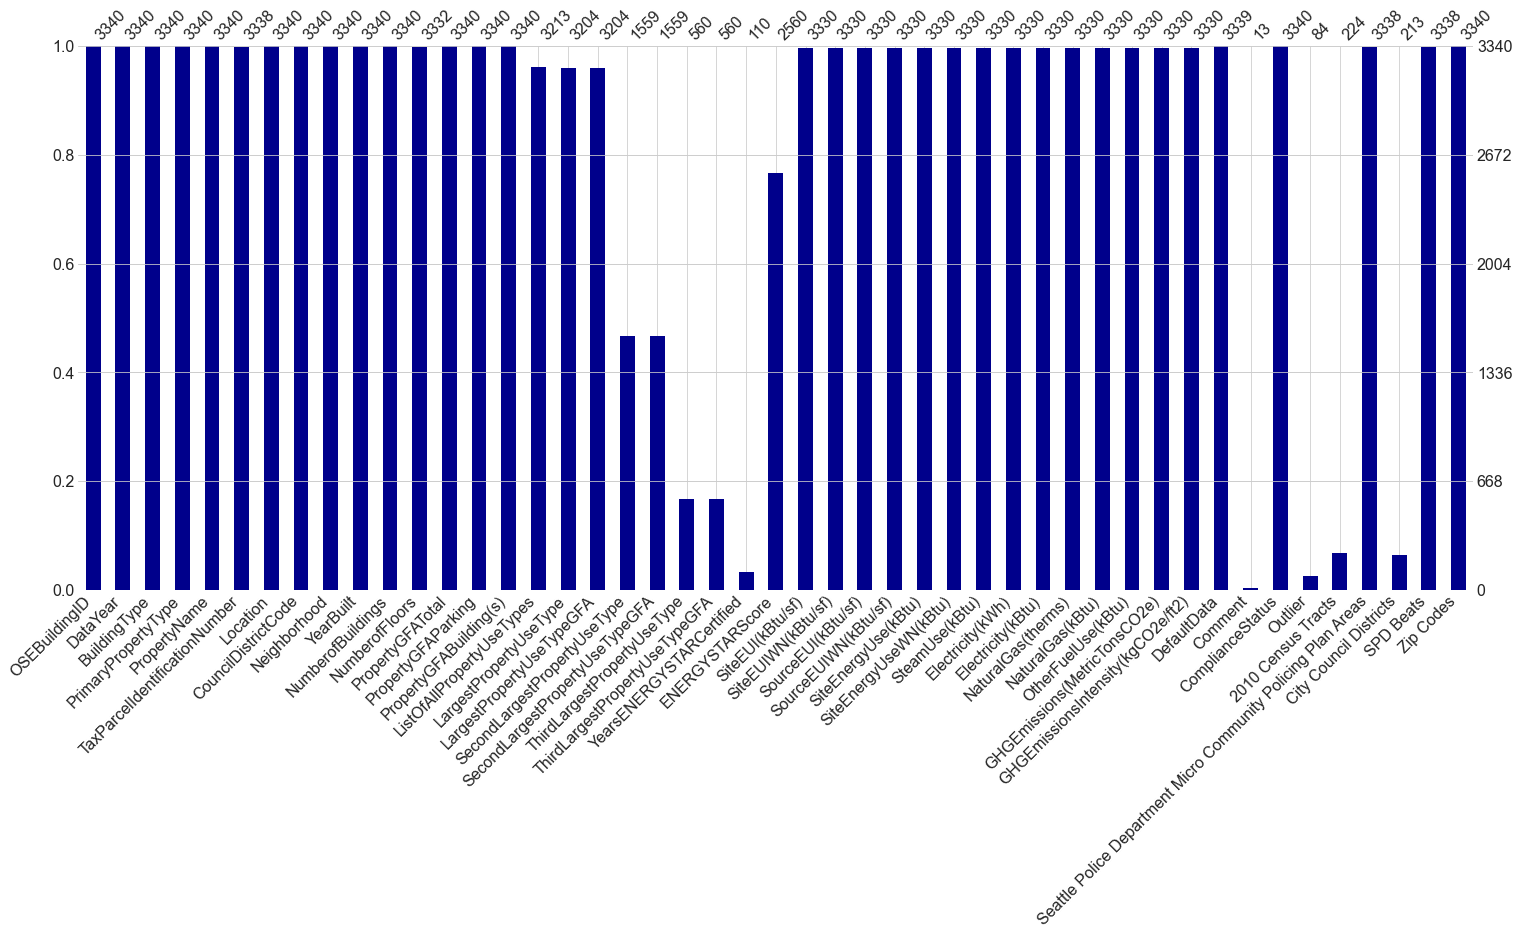

In [5]:
msno.bar(df_elec_2015, color="darkblue")
plt.show()

In [6]:
taux_remp = 100*(1-df_elec_2015.isnull().sum().sum()/(df_elec_2015.shape[0]*df_elec_2015.shape[1]))
print('Le dataset présente un taux de remplissage de ' + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 83%.


In [7]:
df_elec_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


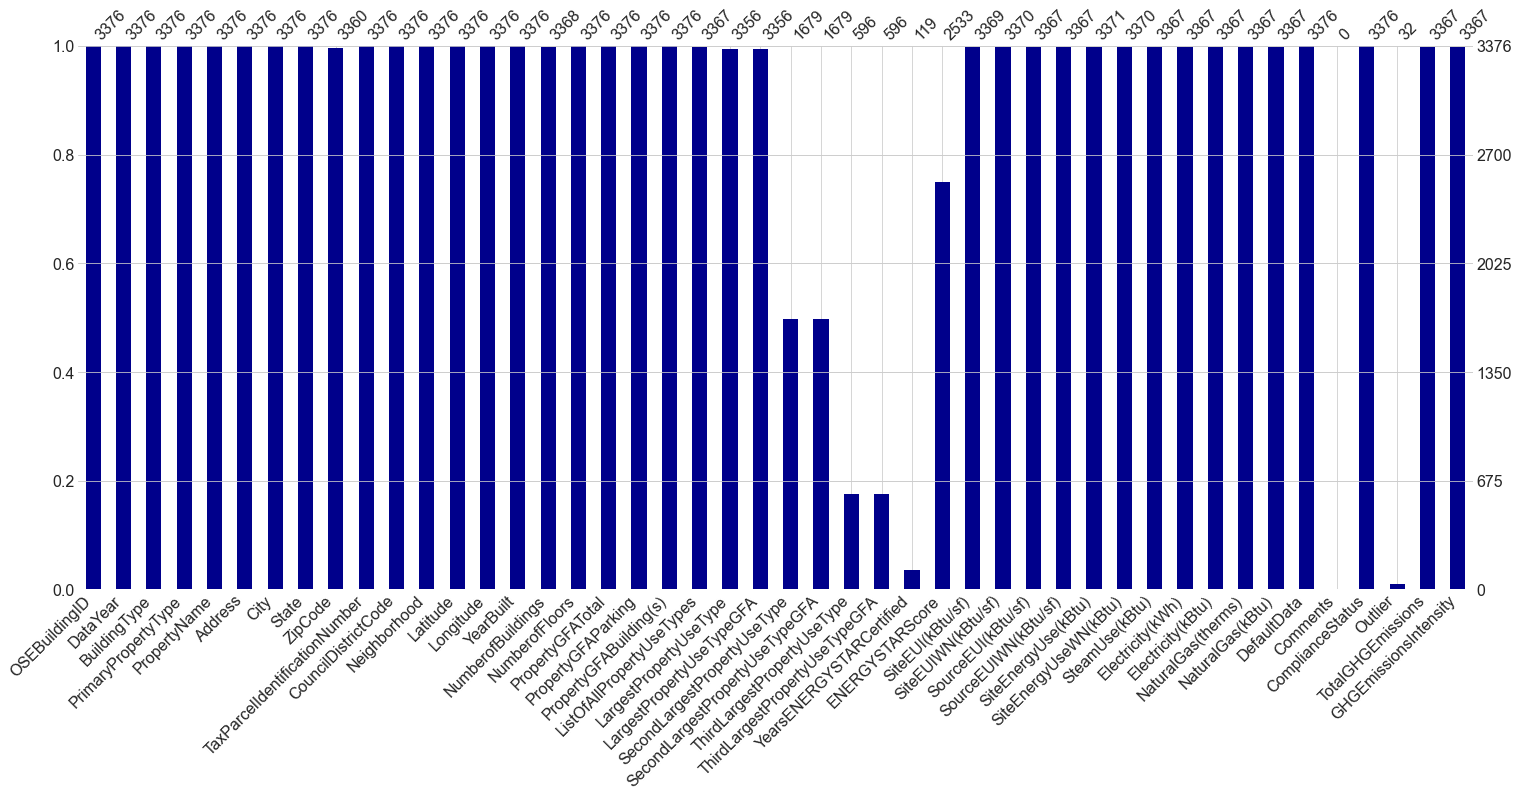

In [8]:
msno.bar(df_elec_2016, color="darkblue")
plt.show()

In [9]:
taux_remp = 100*(1-df_elec_2016.isnull().sum().sum()/(df_elec_2016.shape[0]*df_elec_2016.shape[1]))
print('Le dataset présente un taux de remplissage de ' + str(round(taux_remp)) + '%.')

Le dataset présente un taux de remplissage de 87%.


[Retour au sommaire](#Sommaire)

## Modification et concaténation des fichiers <a class="anchor" id="Partie2"></a>

Tout d'abord, certaines variables n'ont pas la même forme selon le dataframe.

In [10]:
df_elec_2015['PropertyName'] = df_elec_2015['PropertyName'].apply(lambda x: x.capitalize())
df_elec_2016['PropertyName'] = df_elec_2016['PropertyName'].apply(lambda x: x.capitalize())

df_elec_2016['DefaultData'] = df_elec_2016['DefaultData'].apply(lambda x: 'No' if x==False else x)
df_elec_2016['DefaultData'] = df_elec_2016['DefaultData'].apply(lambda x: 'Yes' if x==True else x)

df_elec_2016['ComplianceStatus'] = df_elec_2016['ComplianceStatus'].apply(lambda x: x if (x=='Compliant' or x=='Non-Compliant') else np.nan)
df_elec_2015['ComplianceStatus'] = df_elec_2015['ComplianceStatus'].apply(lambda x: 'Non-Compliant' if x=='Not Compliant' else x)

df_elec_2016['Outlier'] = df_elec_2016['Outlier'].apply(lambda x: 'High Outlier' if x=='High outlier' else x)
df_elec_2016['Outlier'] = df_elec_2016['Outlier'].apply(lambda x: 'Low Outlier' if x=='Low outlier' else x)

In [11]:
print(df_elec_2015.columns)
print(df_elec_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

Les deux datasets n'ont pas les mêmes colonnes, regardons les colonnes qui diffèrent entre les deux datasets.

In [12]:
col_diff = []
for col in df_elec_2015.columns:
    if col not in df_elec_2016:
        col_diff.append(col)

col_diff.append(' ')

for col in df_elec_2016.columns:
    if col not in df_elec_2015:
        col_diff.append(col)

print(col_diff)

['Location', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes', ' ', 'Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude', 'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


Occupons nous d'abord de la colonne ``Location`` de ``df_elec_2015`` qui contient les informations des colonnes ``Adress``, ``City``, ``State``, ``ZipCode``, ``Latitude`` et ``Longitude`` de ``df_elec_2016``.

In [13]:
for index in range(5):
    print(df_elec_2015.iloc[index,6])

{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
{'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{"address": "620 STEWART ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
{'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{"address": "401 LENORA ST", "city": "SEATTLE", "state": "WA", "zip": "98121"}'}


In [14]:
#On récupère les infos sur la localisation du bâtiment
import json
location = df_elec_2015['Location']
df_elec_2015['Latitude'] = pd.Series()
df_elec_2015['Longitude'] = pd.Series()
df_elec_2015['Address'] = pd.Series()
df_elec_2015['City'] = pd.Series()
df_elec_2015['State'] = pd.Series()
df_elec_2015['ZipCode'] = pd.Series()
for index in range(df_elec_2015.shape[0]):
    s = df_elec_2015.iloc[index,6]
    index1 = s.find('h')
    s_ = s[:index1-3] + '}'
    lat_lon = json.loads(s_.replace("'", '"'))
    df_elec_2015.iloc[index, -6] = lat_lon['latitude']
    df_elec_2015.iloc[index, -5] = lat_lon['longitude']
    
    index2 = s.rfind('{')
    index3 = s.find('}')
    addr = json.loads(s[index2:index3+1])
    df_elec_2015.iloc[index, -4] = addr['address']
    df_elec_2015.iloc[index, -3] = addr['city']
    df_elec_2015.iloc[index, -2] = addr['state']
    df_elec_2015.iloc[index, -1] = addr['zip']
df_elec_2015 = df_elec_2015.drop(columns = ['Location'])

In [15]:
col_diff = []
for col in df_elec_2015.columns:
    if col not in df_elec_2016:
        col_diff.append(col)

col_diff.append(' ')

for col in df_elec_2016.columns:
    if col not in df_elec_2015:
        col_diff.append(col)

print(col_diff)

['OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes', ' ', 'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


Nous allons renommer les colonnes des deux jeux de données qui concernent les émissions de dioxydes de carbone ``GHGEmissions`` pour que les noms soient les mêmes dans les deux jeux de données.

In [16]:
df_elec_2015 = df_elec_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions(Tons)'})
df_elec_2016 = df_elec_2016.rename(columns={'GHGEmissionsIntensity': 'GHGEmissionsIntensity(kgCO2e/ft2)',
                                            'TotalGHGEmissions': 'TotalGHGEmissions(Tons)'})

In [17]:
# Pareil pour les commentaires
df_elec_2015 = df_elec_2015.rename(columns={'Comment': 'Comments'})

In [18]:
col_diff = []
for col in df_elec_2015.columns:
    if col not in df_elec_2016:
        col_diff.append(col)

col_diff.append(' ')

for col in df_elec_2016.columns:
    if col not in df_elec_2015:
        col_diff.append(col)

print(col_diff)

['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes', ' ']


On va supprimer les colonnes qui restent.

In [19]:
df_elec_2015 = df_elec_2015.drop(columns = ['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes'])
df_elec_2015 = df_elec_2015[df_elec_2016.columns]

In [20]:
print(df_elec_2015.shape)
print(df_elec_2016.shape)

(3340, 46)
(3376, 46)


Avant de concaténer, vérifions que le type des variables est le même dans chaucun des dataframes.

In [21]:
dfTypes = pd.DataFrame([df_elec_2015.dtypes, df_elec_2016.dtypes]).transpose()
dfTypes.columns = ['2015', '2016']
dfTypes[dfTypes['2015'] != dfTypes['2016']]

,2015,2016
ZipCode,object,float64
Latitude,object,float64
Longitude,object,float64
NumberofBuildings,int64,float64
NumberofFloors,float64,int64
Comments,object,float64


In [22]:
df_elec_2015['ZipCode'] = df_elec_2015['ZipCode'].astype("float64")
df_elec_2015['Latitude'] = df_elec_2015['Latitude'].astype("float64")
df_elec_2015['Longitude'] = df_elec_2015['Longitude'].astype("float64")
df_elec_2015['NumberofBuildings'] = df_elec_2015['NumberofBuildings'].astype("float64")

df_elec_2016['NumberofFloors'] = df_elec_2016['NumberofFloors'].astype("float64")
df_elec_2016['Comments'] = df_elec_2016['Comments'].astype(str)

In [23]:
dfTypes = pd.DataFrame([df_elec_2015.dtypes, df_elec_2016.dtypes]).transpose()
dfTypes.columns = ['2015', '2016']
dfTypes[dfTypes['2015'] != dfTypes['2016']]

,2015,2016


Nous pouvons enfin concaténer les deux dataframes.

In [24]:
df_elec = pd.concat([df_elec_2015, df_elec_2016])
df_elec.shape

(6716, 46)

In [25]:
df_elec.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions(Tons),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2015,NonResidential,Hotel,Mayflower park hotel,405 OLIVE WAY,SEATTLE,WA,98101.0,659000030,...,1080307.0,3686160.0,12724.0,1272388.0,No,NaN,Compliant,NaN,249.43,2.64
1,2,2015,NonResidential,Hotel,Paramount hotel,724 PINE ST,SEATTLE,WA,98101.0,659000220,...,1144563.0,3905411.0,44490.0,4448985.0,No,NaN,Compliant,NaN,263.51,2.38
2,3,2015,NonResidential,Hotel,Westin hotel,1900 5TH AVE,SEATTLE,WA,98101.0,659000475,...,14583930.0,49762435.0,37099.0,3709900.0,Yes,NaN,Compliant,NaN,2061.48,1.92
3,5,2015,NonResidential,Hotel,Hotel max,620 STEWART ST,SEATTLE,WA,98101.0,659000640,...,811521.0,2769023.0,20019.0,2001894.0,No,NaN,Compliant,High Outlier,1936.34,31.38
4,8,2015,NonResidential,Hotel,Warwick seattle hotel,401 LENORA ST,SEATTLE,WA,98121.0,659000970,...,1777841.0,6066245.0,87631.0,8763105.0,No,NaN,Compliant,NaN,507.70,4.02


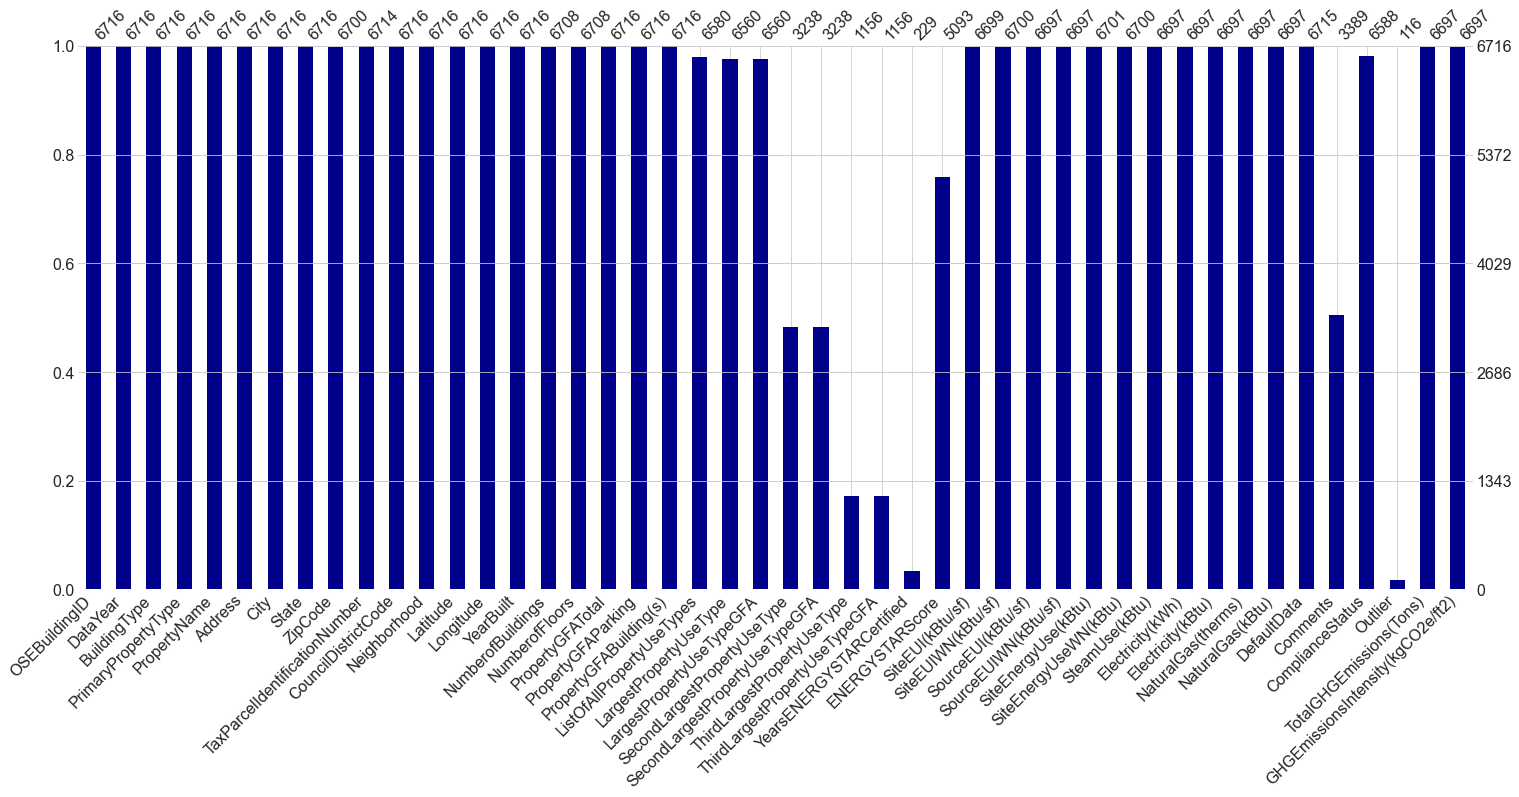

In [26]:
msno.bar(df_elec, color="darkblue")
plt.show()

[Retour au sommaire](#Sommaire)

## Nettoyage <a class="anchor" id="Partie3"></a>
### Sélection des variables pertinentes <a class="anchor" id="Partie3_1"></a>
Dans notre étude, nous nous concentrons sur les bâtiments non résidentiels.

In [27]:
df_elec['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [28]:
df_elec = df_elec[df_elec['BuildingType'].isin(['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA'])]
print(df_elec.shape)
df_elec.head()

(3318, 46)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions(Tons),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2015,NonResidential,Hotel,Mayflower park hotel,405 OLIVE WAY,SEATTLE,WA,98101.0,659000030,...,1080307.0,3686160.0,12724.0,1272388.0,No,NaN,Compliant,NaN,249.43,2.64
1,2,2015,NonResidential,Hotel,Paramount hotel,724 PINE ST,SEATTLE,WA,98101.0,659000220,...,1144563.0,3905411.0,44490.0,4448985.0,No,NaN,Compliant,NaN,263.51,2.38
2,3,2015,NonResidential,Hotel,Westin hotel,1900 5TH AVE,SEATTLE,WA,98101.0,659000475,...,14583930.0,49762435.0,37099.0,3709900.0,Yes,NaN,Compliant,NaN,2061.48,1.92
3,5,2015,NonResidential,Hotel,Hotel max,620 STEWART ST,SEATTLE,WA,98101.0,659000640,...,811521.0,2769023.0,20019.0,2001894.0,No,NaN,Compliant,High Outlier,1936.34,31.38
4,8,2015,NonResidential,Hotel,Warwick seattle hotel,401 LENORA ST,SEATTLE,WA,98121.0,659000970,...,1777841.0,6066245.0,87631.0,8763105.0,No,NaN,Compliant,NaN,507.70,4.02


Sélections ensuite les variables pertinentes pour notre étude :

In [29]:
df_Elec = df_elec[['PropertyName', 'BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
                   'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseType',
                   'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)',
                   'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
                   'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'GHGEmissionsIntensity(kgCO2e/ft2)',
                   'SiteEnergyUse(kBtu)', 'TotalGHGEmissions(Tons)']]

In [30]:
df_Elec.shape

(3318, 26)

[Retour au sommaire](#Sommaire)

### Suppression des données manquantes et des outliers <a class="anchor" id="Partie3_2"></a>
Regardons si certaines variables contiennent trop peu de données pour être étudiées.

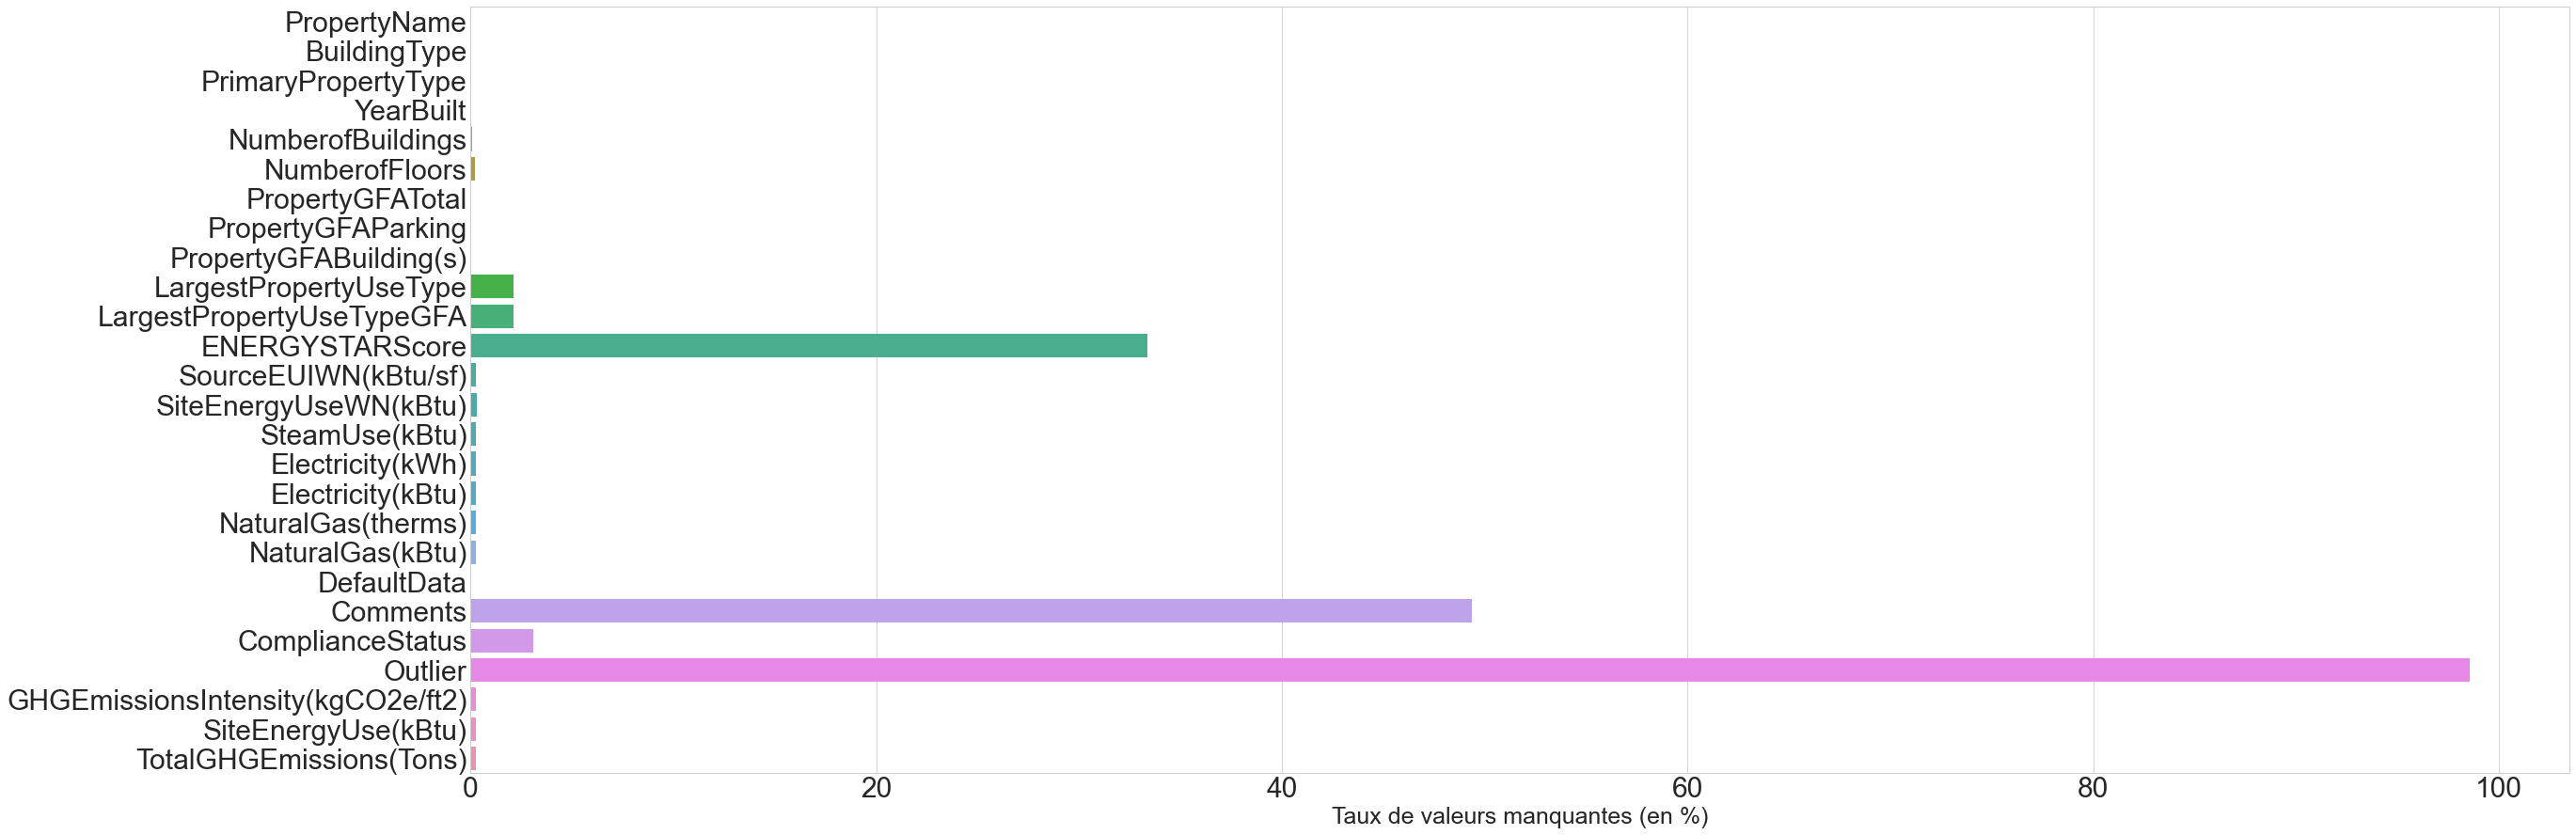

In [31]:
nbNaN = df_Elec.isnull().sum()
colonnes = df_Elec.columns
N = df_Elec.shape[0]
tauxNaN = []
for i in range(len(colonnes)):
    tauxNaN.append(100 * nbNaN[i] / N)
    
plt.figure(figsize=(40, 15))
sns.barplot(y = colonnes, x = tauxNaN)
plt.xlabel('Taux de valeurs manquantes (en %)', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize = 30)
plt.show()

Nous supprimons donc les colonnes ``Comments`` et ``Outlier`` qui contiennent un grand nombre de valeurs manquantes (respectivmeent environ 50% et 98%).

In [32]:
df_Elec_Clean = df_Elec.drop(columns = ['Comments', 'Outlier'])

In [33]:
df_Elec_Clean.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissionsIntensity(kgCO2e/ft2),SiteEnergyUse(kBtu),TotalGHGEmissions(Tons)
count,3318.000000,3316.000000,3310.000000,3.318000e+03,3318.000000,3.318000e+03,3.247000e+03,2211.000000,3309.000000,3.308000e+03,3.309000e+03,3.309000e+03,3.309000e+03,3.309000e+03,3.309000e+03,3309.000000,3.309000e+03,3309.000000
mean,1961.536769,1.117310,4.126888,1.156672e+05,13303.304702,1.023639e+05,9.539352e+04,64.815920,178.655727,7.991069e+06,4.934034e+05,1.651947e+06,5.636556e+06,1.876485e+04,1.876485e+06,1.479716,8.068625e+06,177.038779
std,32.709772,2.219845,6.567333,2.511222e+05,43596.620504,2.340749e+05,2.274274e+05,28.549886,180.633661,2.068644e+07,5.226678e+06,5.102228e+06,1.740900e+07,7.898387e+04,7.898387e+06,2.214812,2.525462e+07,666.442480
min,1900.000000,0.000000,0.000000,1.128500e+04,-2.000000,-5.055000e+04,5.656000e+03,1.000000,-2.100000,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.020000,0.000000e+00,-0.800000
25%,1930.000000,1.000000,1.000000,2.951225e+04,0.000000,2.850775e+04,2.550000e+04,47.000000,80.800000,1.327599e+06,0.000000e+00,2.120948e+05,7.236670e+05,0.000000e+00,0.000000e+00,0.270000,1.223425e+06,19.720000
50%,1965.000000,1.000000,2.000000,4.924600e+04,0.000000,4.736800e+04,4.320000e+04,72.000000,134.800003,2.686911e+06,0.000000e+00,4.758666e+05,1.623657e+06,4.797690e+03,4.797690e+05,0.780000,2.505271e+06,49.160000
75%,1989.000000,1.000000,4.000000,1.047860e+05,0.000000,9.447150e+04,9.000000e+04,89.000000,207.800003,7.175216e+06,0.000000e+00,1.429920e+06,4.878886e+06,1.471375e+04,1.471375e+06,1.760000,6.917280e+06,138.870000
max,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,100.000000,2620.000000,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,34.090000,8.739237e+08,16870.980000


Nous pouvons déjà remarquer que nous avons des valeurs négatives pour certaines variables (``PropertyGFAParking`` et ``PropertyGFABuilding(s)`` par exemple), il faut les supprimer.

In [34]:
for col in df_Elec_Clean.select_dtypes(include=['float64', 'int64']):
    df_Elec_Clean = df_Elec_Clean[~(df_Elec_Clean[col] < 0)]

In [35]:
df_Elec_Clean.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissionsIntensity(kgCO2e/ft2),SiteEnergyUse(kBtu),TotalGHGEmissions(Tons)
count,3313.00000,3311.000000,3305.000000,3.313000e+03,3313.000000,3.313000e+03,3.242000e+03,2207.000000,3304.000000,3.303000e+03,3.304000e+03,3.304000e+03,3.304000e+03,3.304000e+03,3.304000e+03,3304.000000,3.304000e+03,3304.000000
mean,1961.47208,1.117487,4.123752,1.157663e+05,13268.591609,1.024977e+05,9.544947e+04,64.776620,178.777300,8.000248e+06,4.941500e+05,1.653652e+06,5.642373e+06,1.879325e+04,1.879325e+06,1.481822,8.077984e+06,177.287781
std,32.68848,2.221516,6.571003,2.512983e+05,43585.824402,2.342180e+05,2.275977e+05,28.554007,180.711427,2.070066e+07,5.230598e+06,5.105870e+06,1.742143e+07,7.904025e+04,7.904025e+06,2.215823,2.527252e+07,666.915811
min,1900.00000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1930.00000,1.000000,1.000000,2.950800e+04,0.000000,2.853100e+04,2.550000e+04,47.000000,80.800000,1.328496e+06,0.000000e+00,2.122910e+05,7.243368e+05,0.000000e+00,0.000000e+00,0.270000,1.223996e+06,19.752500
50%,1965.00000,1.000000,2.000000,4.924300e+04,0.000000,4.736800e+04,4.315500e+04,72.000000,134.850002,2.688676e+06,0.000000e+00,4.760998e+05,1.624486e+06,4.815500e+03,4.815680e+05,0.780000,2.508795e+06,49.180000
75%,1989.00000,1.000000,4.000000,1.049000e+05,0.000000,9.447200e+04,9.025875e+04,89.000000,207.850002,7.179021e+06,0.000000e+00,1.430365e+06,4.880607e+06,1.472630e+04,1.472630e+06,1.760000,6.922040e+06,139.022500
max,2015.00000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,100.000000,2620.000000,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,34.090000,8.739237e+08,16870.980000


Ensuite, des valeurs de consommation d'énergie ou d'émissions de CO2 nulles correspondent à une absence de données. Nous allons donc les supprimer.

In [36]:
df_Elec_Clean = df_Elec_Clean[df_Elec_Clean['SiteEnergyUse(kBtu)'] > 0]
df_Elec_Clean = df_Elec_Clean[df_Elec_Clean['TotalGHGEmissions(Tons)'] > 0]

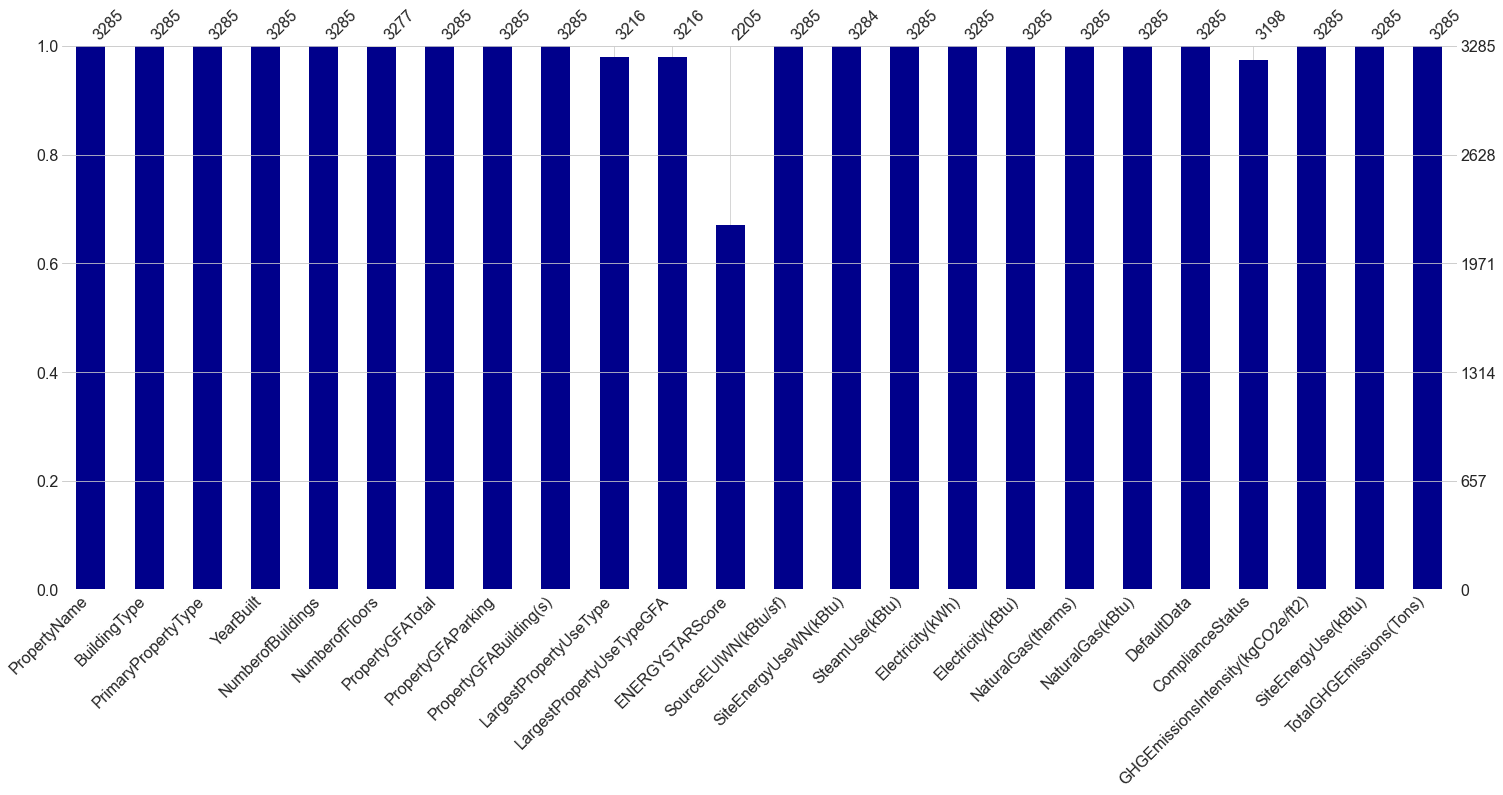

In [37]:
msno.bar(df_Elec_Clean, color="darkblue")
plt.show()

Nous allons supprimer les lignes qui contiennent des valeurs manquantes sur une de nos variables *d'intérêt*.

In [38]:
df_Elec_Clean = df_Elec_Clean.dropna(subset = ['PropertyName', 'PrimaryPropertyType', 'YearBuilt', 'NumberofBuildings',
                                               'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
                                               'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
                                               'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions(Tons)'])

In [39]:
df_Elec_Clean.shape

(2150, 24)

[Retour au sommaire](#Sommaire)

## Analyse Exploratoire <a class="anchor" id="Partie4"></a>
### Analyse univariée <a class="anchor" id="Partie4_1"></a>

In [40]:
def decrit_variable(df, colonne):
    df = df.dropna(subset=[colonne])
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Boxplot    
    sns.boxplot(df[colonne], ax=axes[0])
    plt.sca(axes[0])
    plt.title(colonne, fontsize = 20)
    plt.xlabel('Valeurs de la variable', fontsize = 15)
    plt.tick_params(axis='x', which='major', labelsize=15)
    plt.tick_params(axis='y', which='major', labelsize=15)
    
    # Histogramme
    sns.distplot(df[colonne], ax=axes[1])
    plt.sca(axes[1])
    plt.title(colonne, fontsize = 20)
    plt.xlabel('Valeurs de la variable', fontsize = 15)
    plt.ylabel('Densité', fontsize = 15)
    plt.tick_params(axis='x', which='major', labelsize=15)
    plt.tick_params(axis='y', which='major', labelsize=15)  
    
    plt.show()

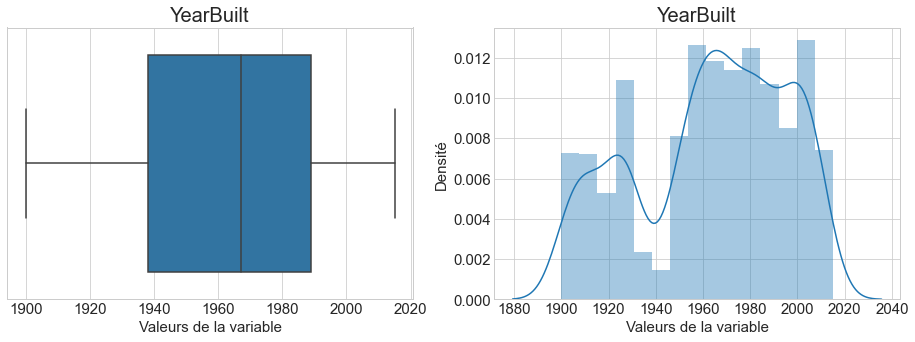

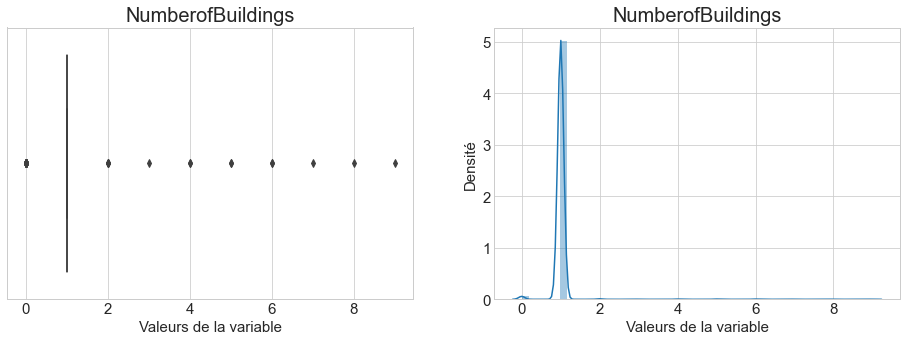

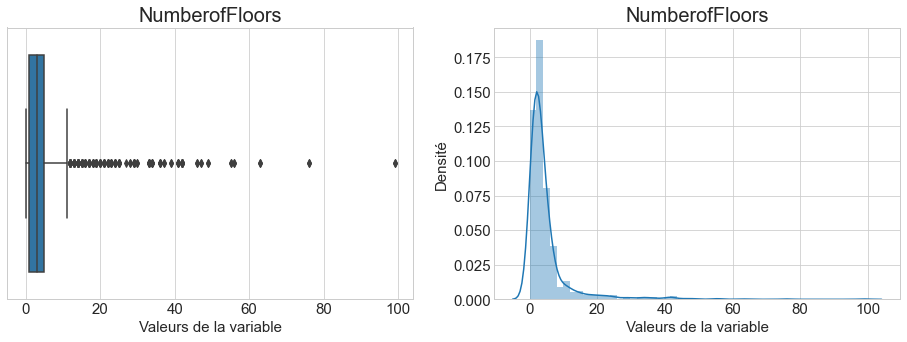

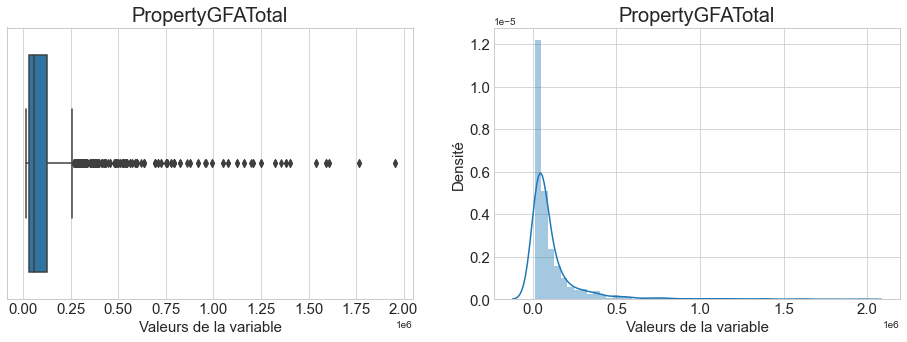

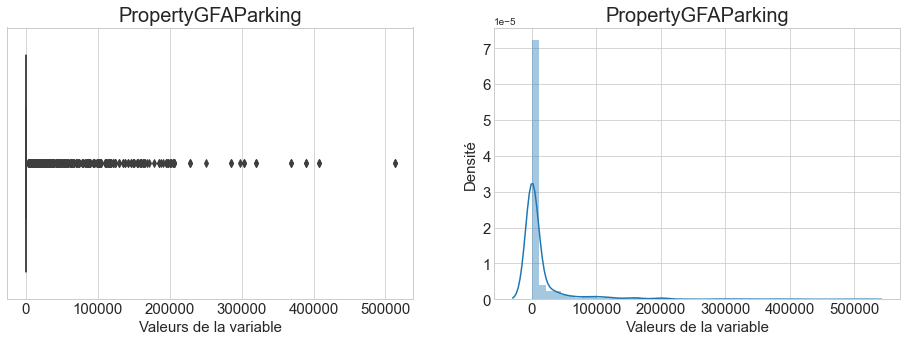

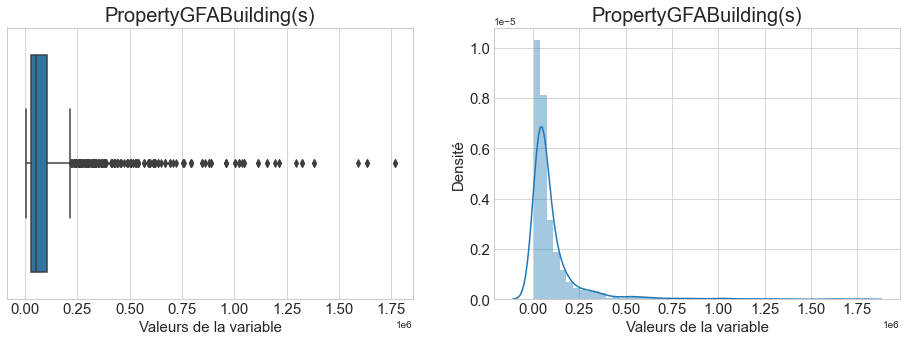

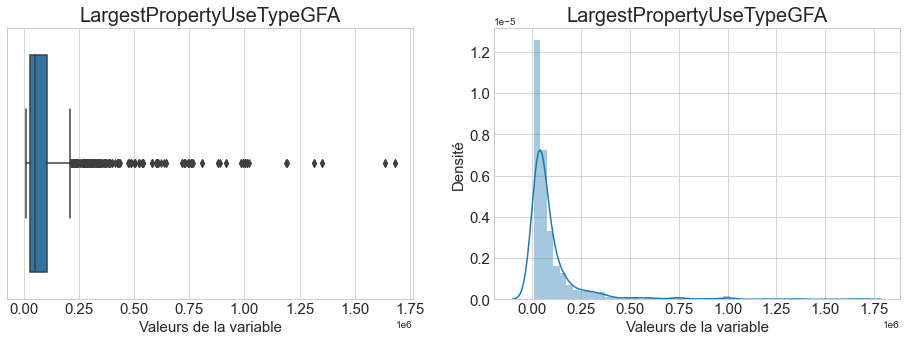

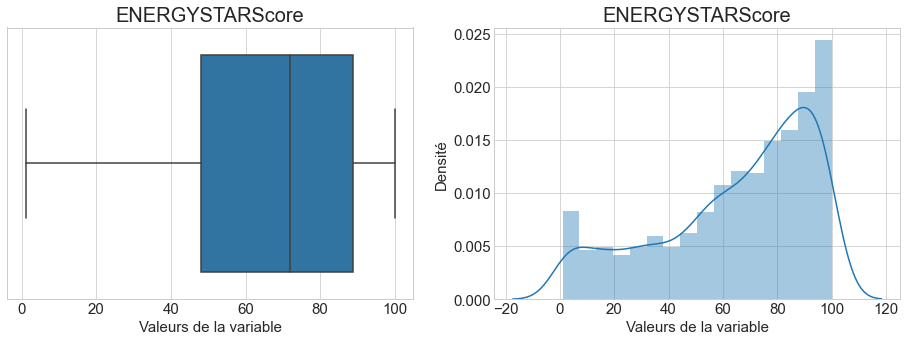

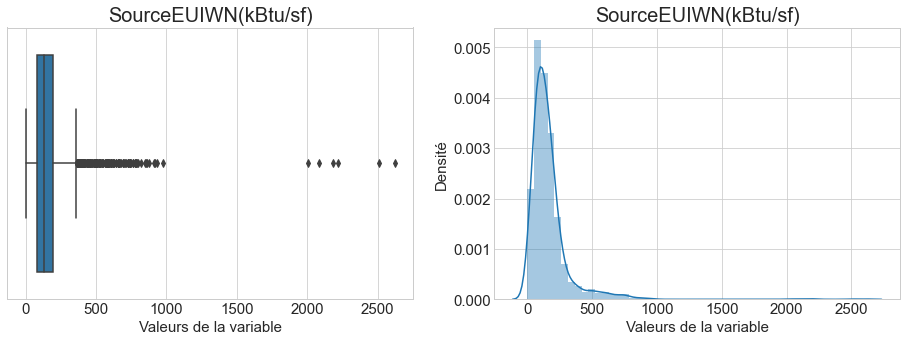

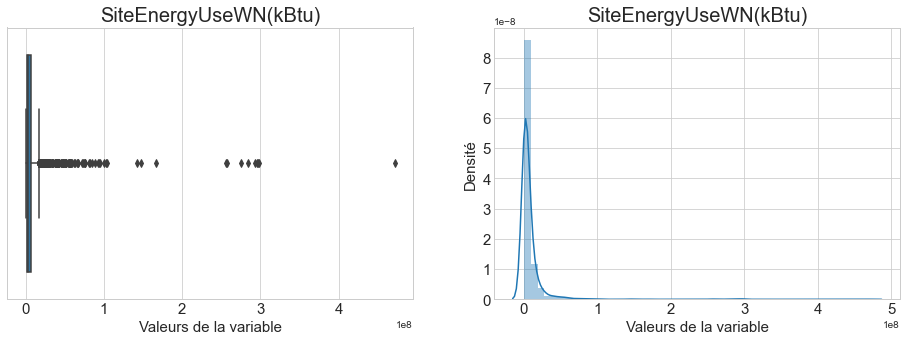

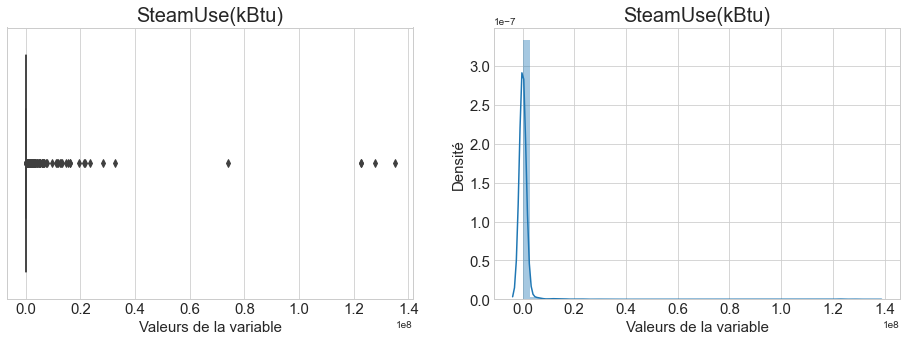

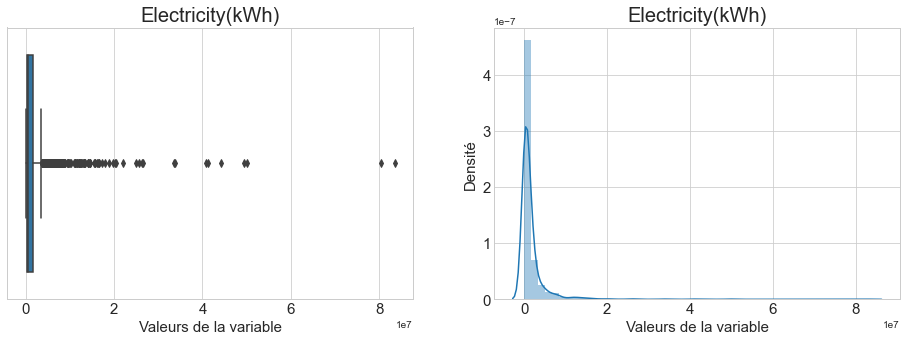

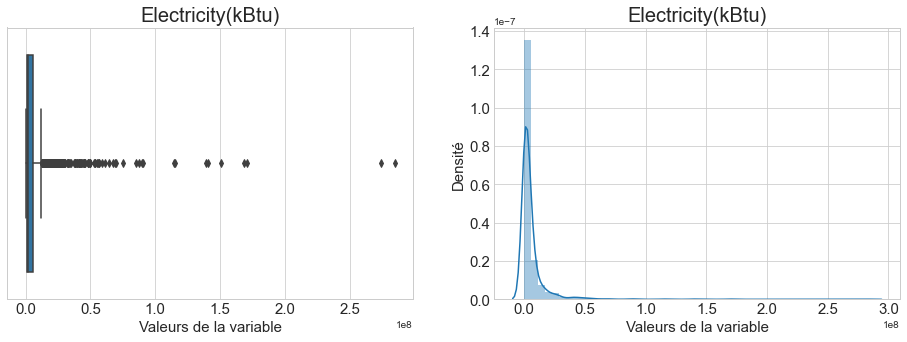

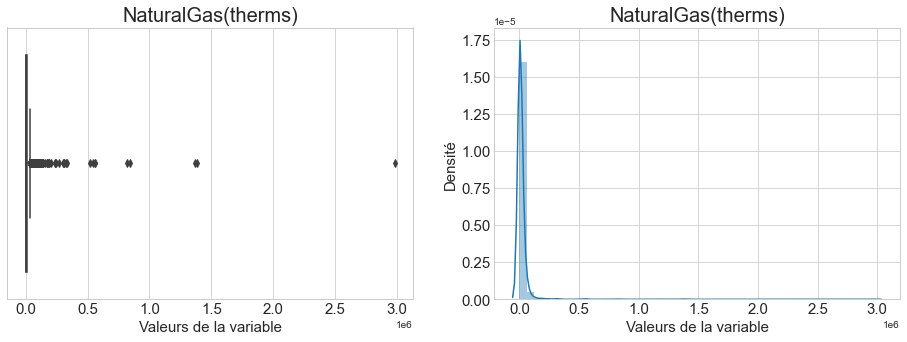

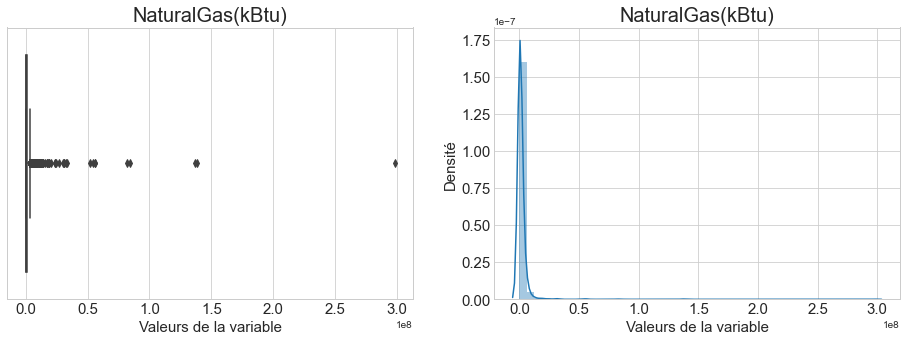

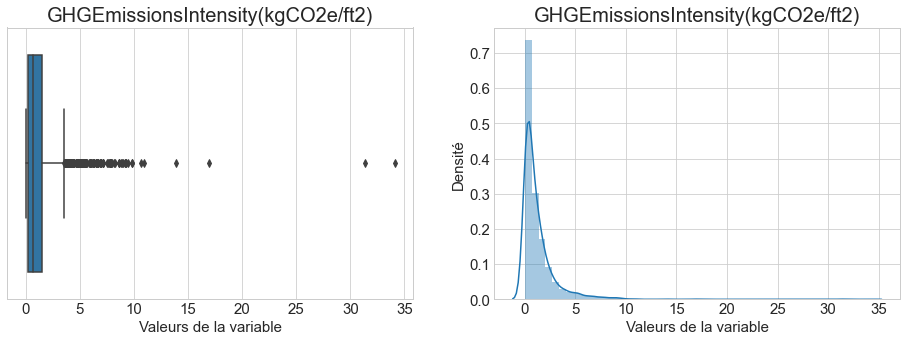

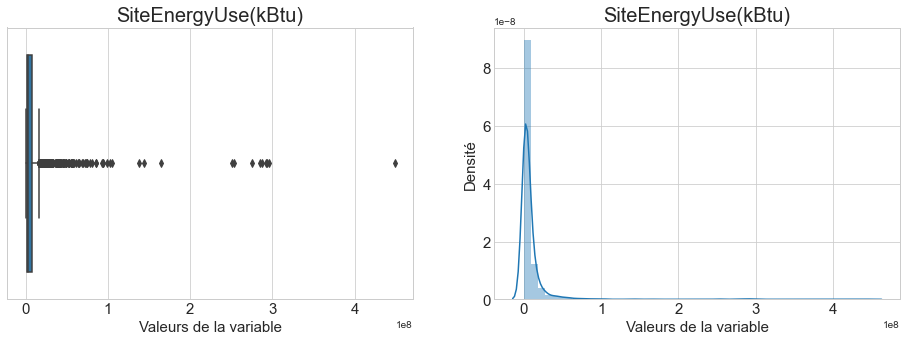

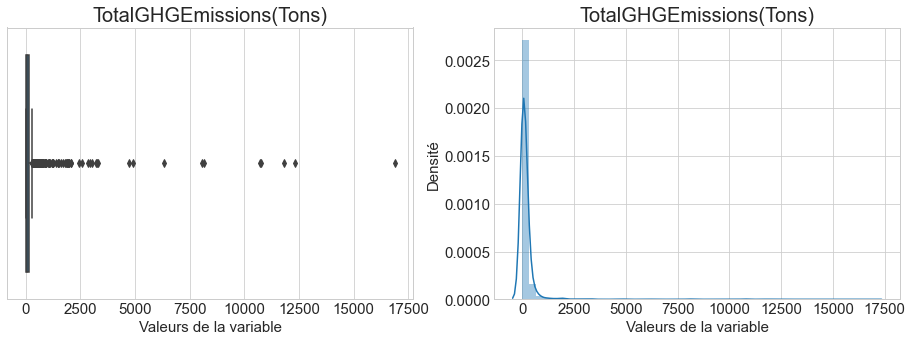

In [41]:
for col in df_Elec_Clean.select_dtypes(include=['float64', 'int64']):
    decrit_variable(df_Elec_Clean, col)

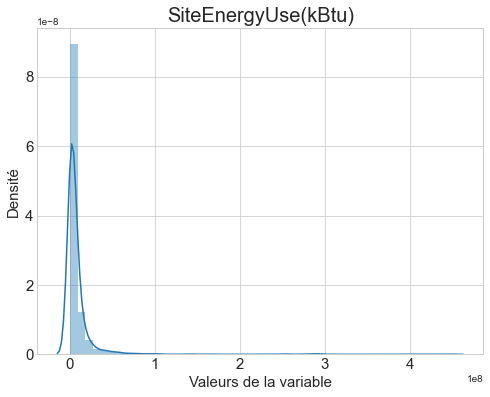

In [42]:
plt.figure(figsize=(8,6))
sns.distplot(df_Elec_Clean['SiteEnergyUse(kBtu)'])
plt.title('SiteEnergyUse(kBtu)', fontsize = 20)
plt.xlabel('Valeurs de la variable', fontsize = 15)
plt.ylabel('Densité', fontsize = 15)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)  
plt.show()

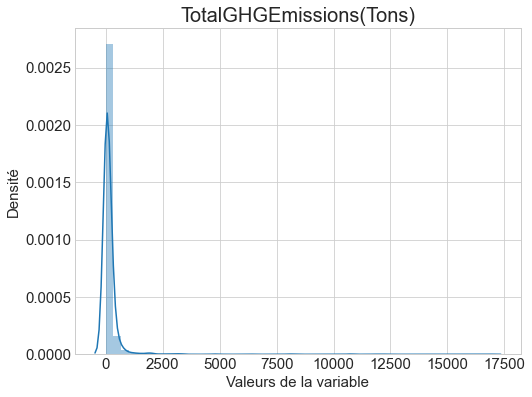

In [43]:
plt.figure(figsize=(8,6))
sns.distplot(df_Elec_Clean['TotalGHGEmissions(Tons)'])
plt.title('TotalGHGEmissions(Tons)', fontsize = 20)
plt.xlabel('Valeurs de la variable', fontsize = 15)
plt.ylabel('Densité', fontsize = 15)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

In [44]:
df_Elec_Clean.sort_values('SiteEnergyUse(kBtu)', ascending=False).head()

,PropertyName,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,GHGEmissionsIntensity(kgCO2e/ft2),SiteEnergyUse(kBtu),TotalGHGEmissions(Tons)
35,Plant 2 site,Campus,Mixed Use Property,1992,1.0,3.0,494835,0,494835,Office,...,0.0,44102076.0,150476283.0,2.979090e+06,297909000.0,No,Compliant,34.09,448385312.0,16870.98
170,Harborview medical center,NonResidential,Hospital,2000,1.0,8.0,1158691,0,1158691,Hospital (General Medical & Surgical),...,122701720.0,50083380.0,170891586.0,2.226400e+04,2226424.0,No,Compliant,8.67,295812640.0,10780.64
170,Harborview medical center,NonResidential,Hospital,2000,9.0,8.0,1158691,0,1158691,Hospital (General Medical & Surgical),...,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,No,Compliant,9.26,293090784.0,10734.57
618,Swedish first hill,NonResidential,Hospital,1994,7.0,14.0,1765970,0,1765970,Hospital (General Medical & Surgical),...,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,No,Compliant,6.97,291614432.0,12307.16
621,Swedish hospital medical center first hill campus,NonResidential,Hospital,1994,1.0,14.0,1765970,0,1765970,Hospital (General Medical & Surgical),...,127869744.0,41161340.0,140448322.0,1.837330e+05,18373320.0,No,Compliant,6.35,286685536.0,11824.89


In [45]:
df_Elec_Clean.sort_values('TotalGHGEmissions(Tons)', ascending=False).head()

,PropertyName,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,GHGEmissionsIntensity(kgCO2e/ft2),SiteEnergyUse(kBtu),TotalGHGEmissions(Tons)
35,Plant 2 site,Campus,Mixed Use Property,1992,1.0,3.0,494835,0,494835,Office,...,0.0,44102076.0,150476283.0,2.979090e+06,297909000.0,No,Compliant,34.09,448385312.0,16870.98
618,Swedish first hill,NonResidential,Hospital,1994,7.0,14.0,1765970,0,1765970,Hospital (General Medical & Surgical),...,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,No,Compliant,6.97,291614432.0,12307.16
621,Swedish hospital medical center first hill campus,NonResidential,Hospital,1994,1.0,14.0,1765970,0,1765970,Hospital (General Medical & Surgical),...,127869744.0,41161340.0,140448322.0,1.837330e+05,18373320.0,No,Compliant,6.35,286685536.0,11824.89
170,Harborview medical center,NonResidential,Hospital,2000,1.0,8.0,1158691,0,1158691,Hospital (General Medical & Surgical),...,122701720.0,50083380.0,170891586.0,2.226400e+04,2226424.0,No,Compliant,8.67,295812640.0,10780.64
170,Harborview medical center,NonResidential,Hospital,2000,9.0,8.0,1158691,0,1158691,Hospital (General Medical & Surgical),...,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,No,Compliant,9.26,293090784.0,10734.57


[Retour au sommaire](#Sommaire)

### Analyse bivariée <a class="anchor" id="Partie4_2"></a>
Regardons la matrice de corrélation de notre jeu de données.

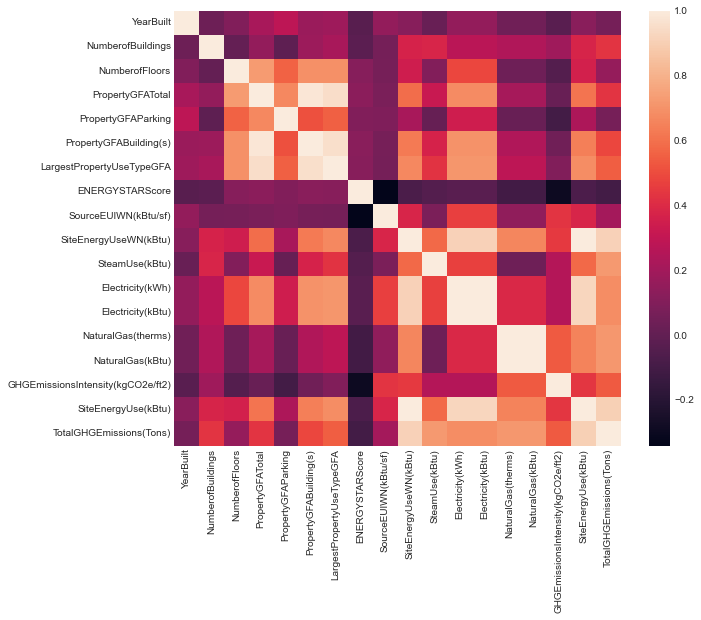

In [46]:
corr_df = df_Elec_Clean.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=False)
plt.show()

Nous pouvons remarquer plusieurs corrélations linéaires :
- Des corrélations très fortes entre des variables qui représentent la même chose :
    - entre ```PropertyGFATotal```, ```PropertyGFABuilding(s)``` et ```LargestPropertyUseTypeGFA```;
    - entre ```Electricity(kWh)``` et ```Electricity(kBtu)```;
    - entre ```NaturalGas(therms)``` et ```NaturalGas(kBtu)```.
- Des corrélations moins fortes entre nos variables cibles et les autres variables.
    -  ```PropertyGFATotal```, ```PropertyGFABuilding(s)```, ```LargestPropertyUseTypeGFA```, ```SiteEnergyUseWN(kBtu)```, ```Electricity(kWh)```, ```Electricity(kBtu)``` et ```TotalGHGEmissions(Tons)``` avec **```SiteEnergyUse(kBtu)```**.
    - ```SiteEnergyUseWN(kBtu)```, ```SteamUSe(kBtu)```, ```NaturalGas(therms)```, ```NaturalGas(kBtu)``` et ```SiteEnergyUse(kBtu)``` avec **```TotalGHGEmissions(Tons)```**.
    
Regardons quelques-unes de ces corrélations.

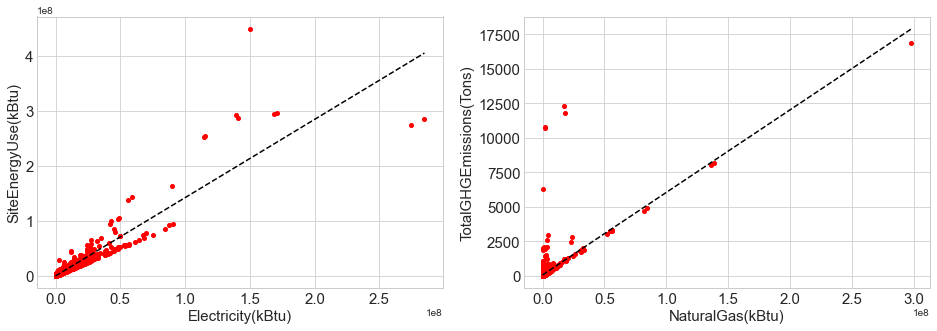

In [47]:
colonnesA = ['Electricity(kBtu)', 'NaturalGas(kBtu)']            
colonnesB = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions(Tons)']

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
for i in range(len(colonnesA)):
    colonneA = colonnesA[i]
    colonneB = colonnesB[i]
    
    SerieA = df_Elec_Clean[colonneA]
    SerieB = df_Elec_Clean[colonneB]

    X = np.matrix([np.ones(df_Elec_Clean.shape[0]), SerieA]).T
    y = np.matrix(SerieB).T

    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    plt.sca(axes[i])
    plt.plot(SerieA, SerieB, 'ro', markersize=4)
    plt.plot([0, SerieA.max()], [theta.item(0), theta.item(0) + SerieA.max() * theta.item(1)], linestyle='--', c='#000000')
    plt.xlabel(colonneA, fontsize = 15)
    plt.ylabel(colonneB, fontsize = 15)
    plt.tick_params(axis='x', which='major', labelsize=15)
    plt.tick_params(axis='y', which='major', labelsize=15) 
plt.show()

Les variables qui ne présentent pas de corrélation linéaire avec nos varibales cibles présentent peut-être des corrélations non-linéaires avec celles-ci. Nous les garderons donc pour l'étude.

[Retour au sommaire](#Sommaire)

### Variables catégorielles <a class="anchor" id="Partie4_3"></a>

In [48]:
for col in df_Elec_Clean.select_dtypes(exclude=['float64', 'int64']):
    print(col + ' : ' + str(len(df_Elec_Clean[col].unique())) + ' valeurs différentes.')

PropertyName : 1843 valeurs différentes.
BuildingType : 4 valeurs différentes.
PrimaryPropertyType : 23 valeurs différentes.
LargestPropertyUseType : 26 valeurs différentes.
DefaultData : 2 valeurs différentes.
ComplianceStatus : 3 valeurs différentes.


Nous allons donc réduire le nombre de modalités pour le type de bâtiments (```PrimaryPropertyType``` et ```LargestPropertyUseType```) pour pouvoir les étudier plus facilement. Nous voulons garder seulement 6 modalités maximum. 

Nous choisissons (arbitrairement) de séparer les bâtiments en utilisant la consommation d'energie ```TotalGHGEmissions(Tons)```.

In [49]:
df_Elec_Clean['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'K-12 School', 'Self-Storage Facility\n',
       'Small- and Mid-Sized Office', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Worship Facility',
       'Supermarket/Grocery Store', 'Mixed Use Property',
       'Distribution Center\n', 'Refrigerated Warehouse',
       'Residence Hall', 'Warehouse', 'Supermarket / Grocery Store',
       'Distribution Center', 'Low-Rise Multifamily', 'Office'],
      dtype=object)

In [50]:
df_Elec_Clean['PrimaryPropertyType'] = df_Elec_Clean['PrimaryPropertyType'].str.replace('\n','')
df_Elec_Clean['PrimaryPropertyType'] = df_Elec_Clean['PrimaryPropertyType'].apply(lambda x: 'Supermarket/Grocery Store'
                                                                                  if x=='Supermarket / Grocery Store' else x)

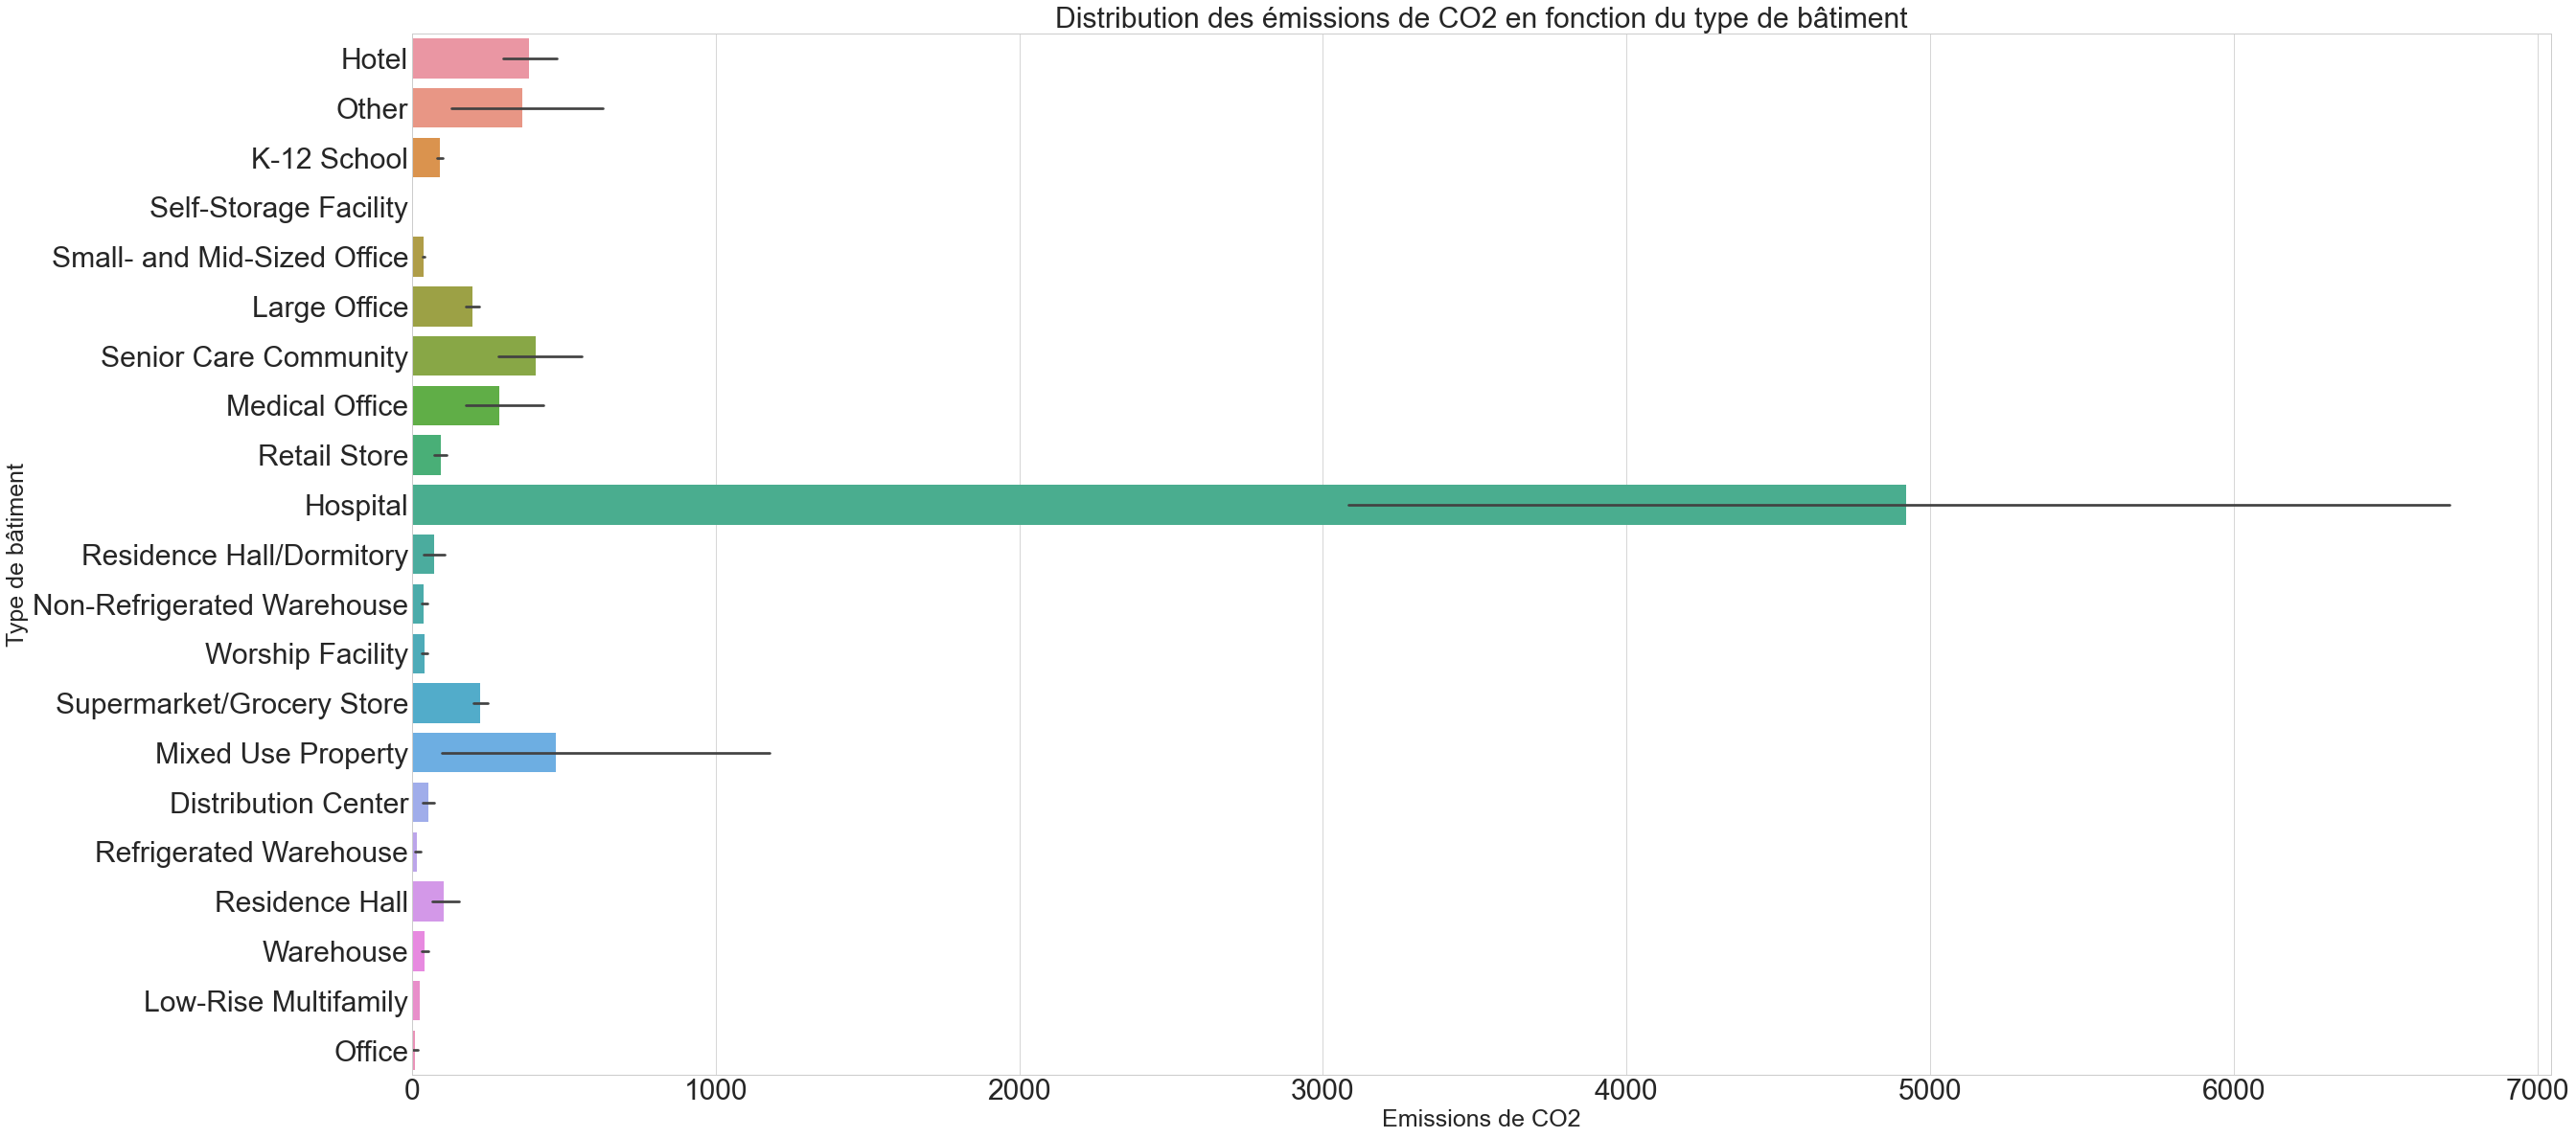

In [51]:
plt.figure(figsize=(40, 20))
sns.barplot(y = df_Elec_Clean['PrimaryPropertyType'], x = df_Elec_Clean['TotalGHGEmissions(Tons)'])
plt.ylabel('Type de bâtiment', fontsize = 25)
plt.xlabel('Emissions de CO2', fontsize = 25)
plt.title('Distribution des émissions de CO2 en fonction du type de bâtiment', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize = 30)
plt.show()

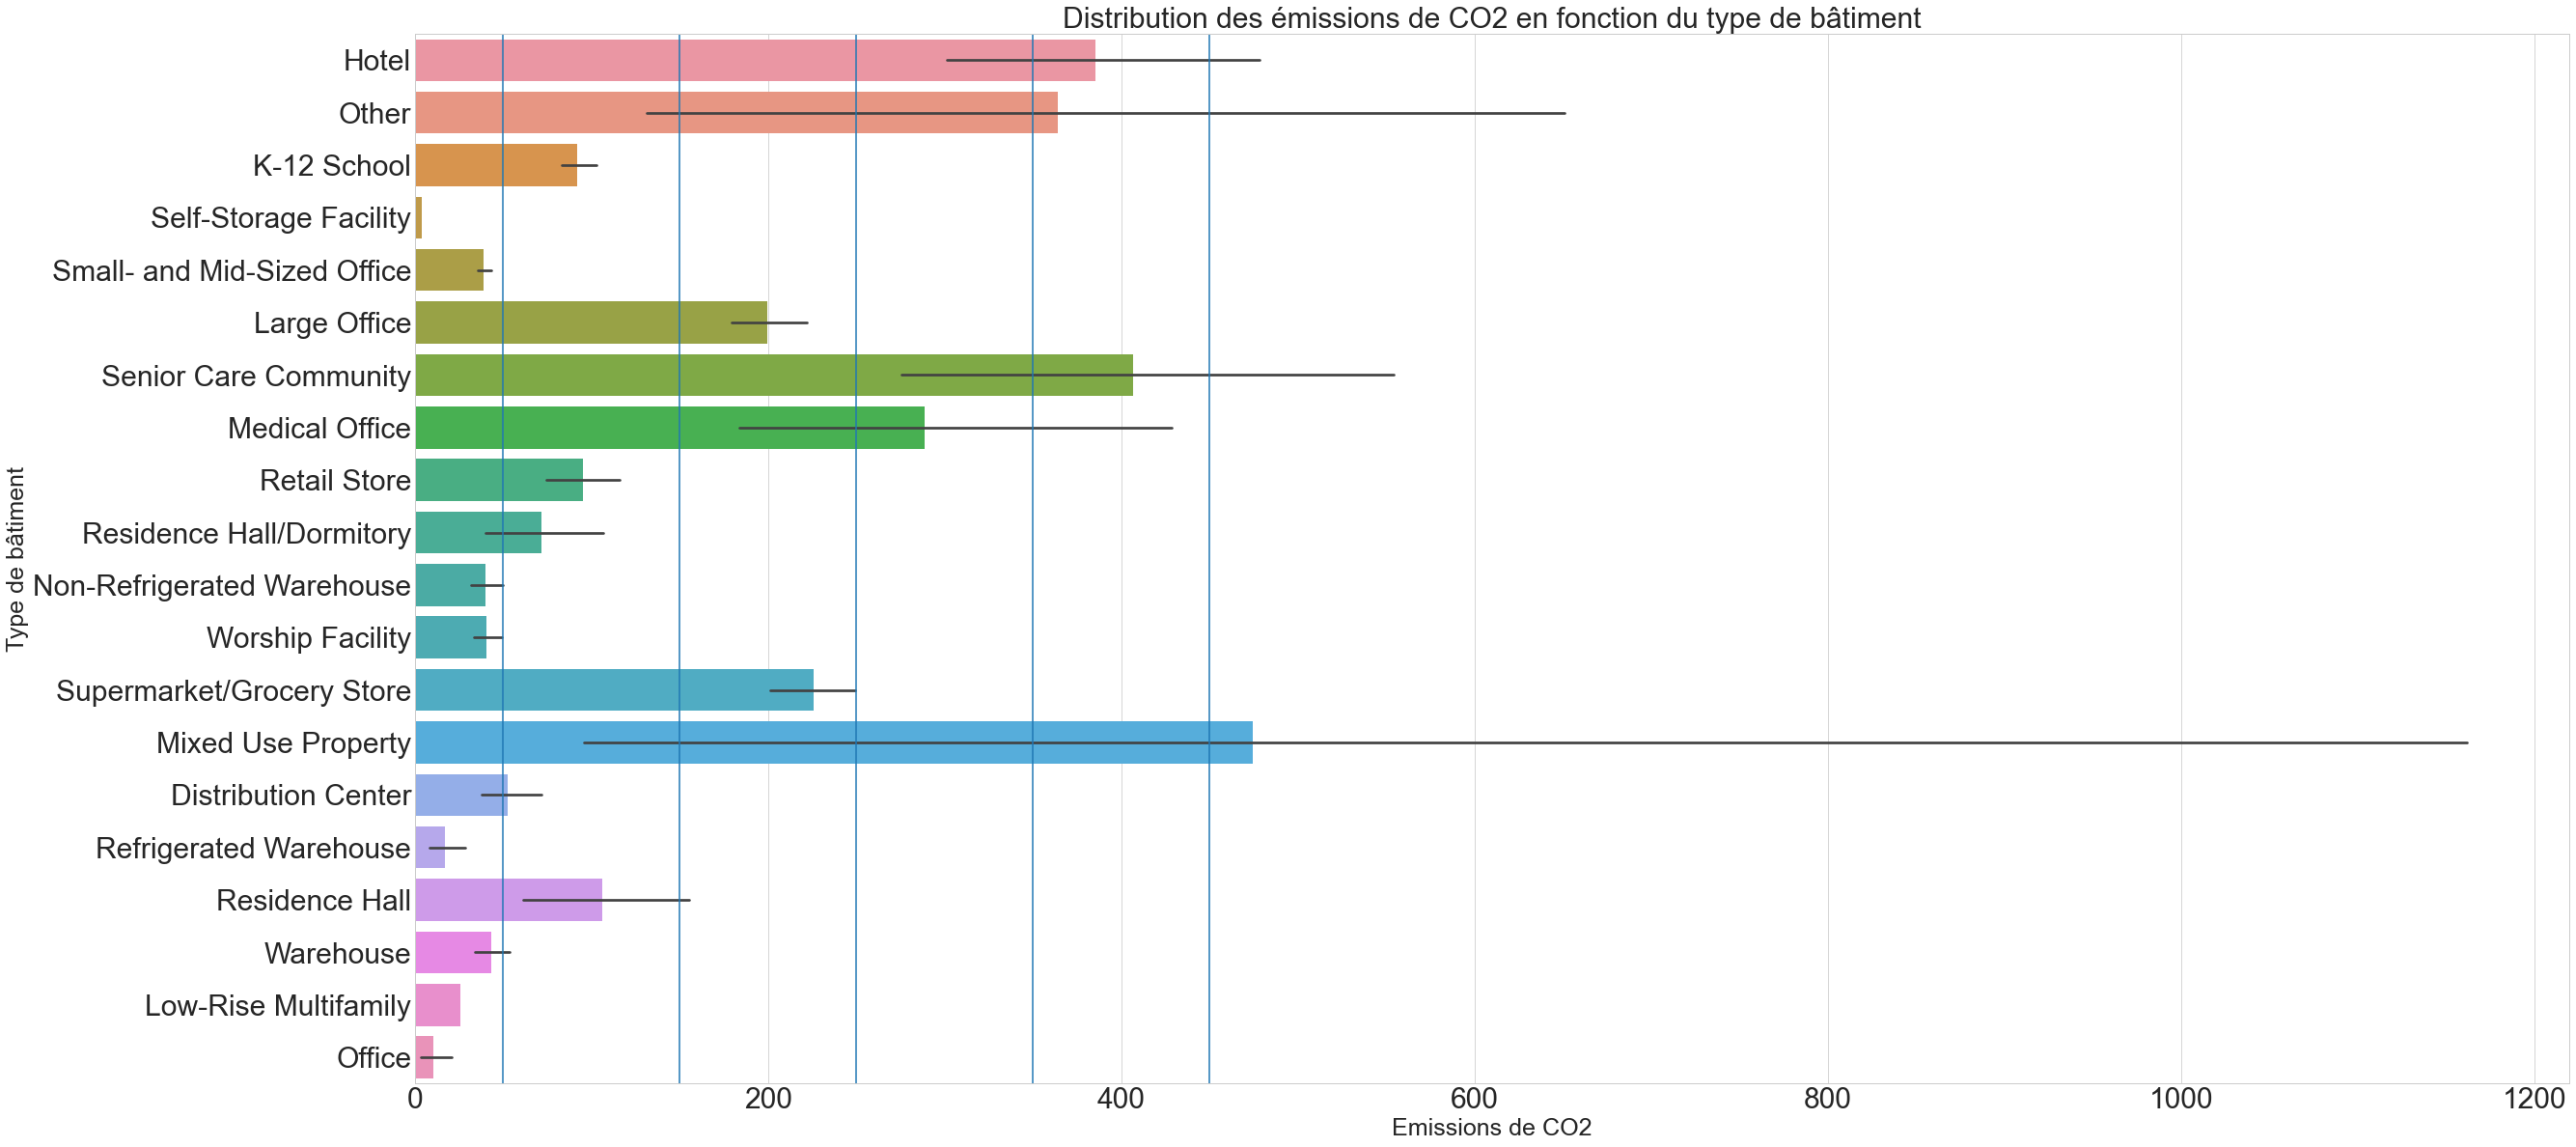

In [52]:
# Nous n'affichons pas les hôpitaux pour que le graphe soit plus lisible.
data = df_Elec_Clean[~(df_Elec_Clean['PrimaryPropertyType'] == 'Hospital')]

plt.figure(figsize=(40, 20))
sns.barplot(y = data['PrimaryPropertyType'], x = data['TotalGHGEmissions(Tons)'])
plt.ylabel('Type de bâtiment', fontsize = 25)
plt.xlabel('Emissions de CO2', fontsize = 25)
plt.title('Distribution des émissions de CO2 en fonction du type de bâtiment', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize = 30)
plt.axvline(x = 50)
plt.axvline(x = 150)
plt.axvline(x = 250)
plt.axvline(x = 350)
plt.axvline(x = 450)
plt.show()

In [53]:
df_Elec_Clean['LargestPropertyUseType'].unique()

array(['Hotel', 'Courthouse', 'K-12 School', 'Self-Storage Facility',
       'Office', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)',
       'Residence Hall/Dormitory', 'Financial Office',
       'Non-Refrigerated Warehouse', 'Worship Facility',
       'Supermarket/Grocery Store', 'Parking', 'Distribution Center',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse',
       'Data Center', 'Other - Public Services', 'Bank Branch',
       'Laboratory', 'Manufacturing/Industrial Plant',
       'Multifamily Housing', 'Other - Restaurant/Bar', 'Other'],
      dtype=object)

In [54]:
df_Elec_Clean['LargestPropertyUseType'] = df_Elec_Clean['LargestPropertyUseType'].apply(lambda x: 'Offices'
                                                                                        if x=='Office' else x)
df_Elec_Clean['LargestPropertyUseType'] = df_Elec_Clean['LargestPropertyUseType'].apply(lambda x: 'Others'
                                                                                        if x=='Other' else x)

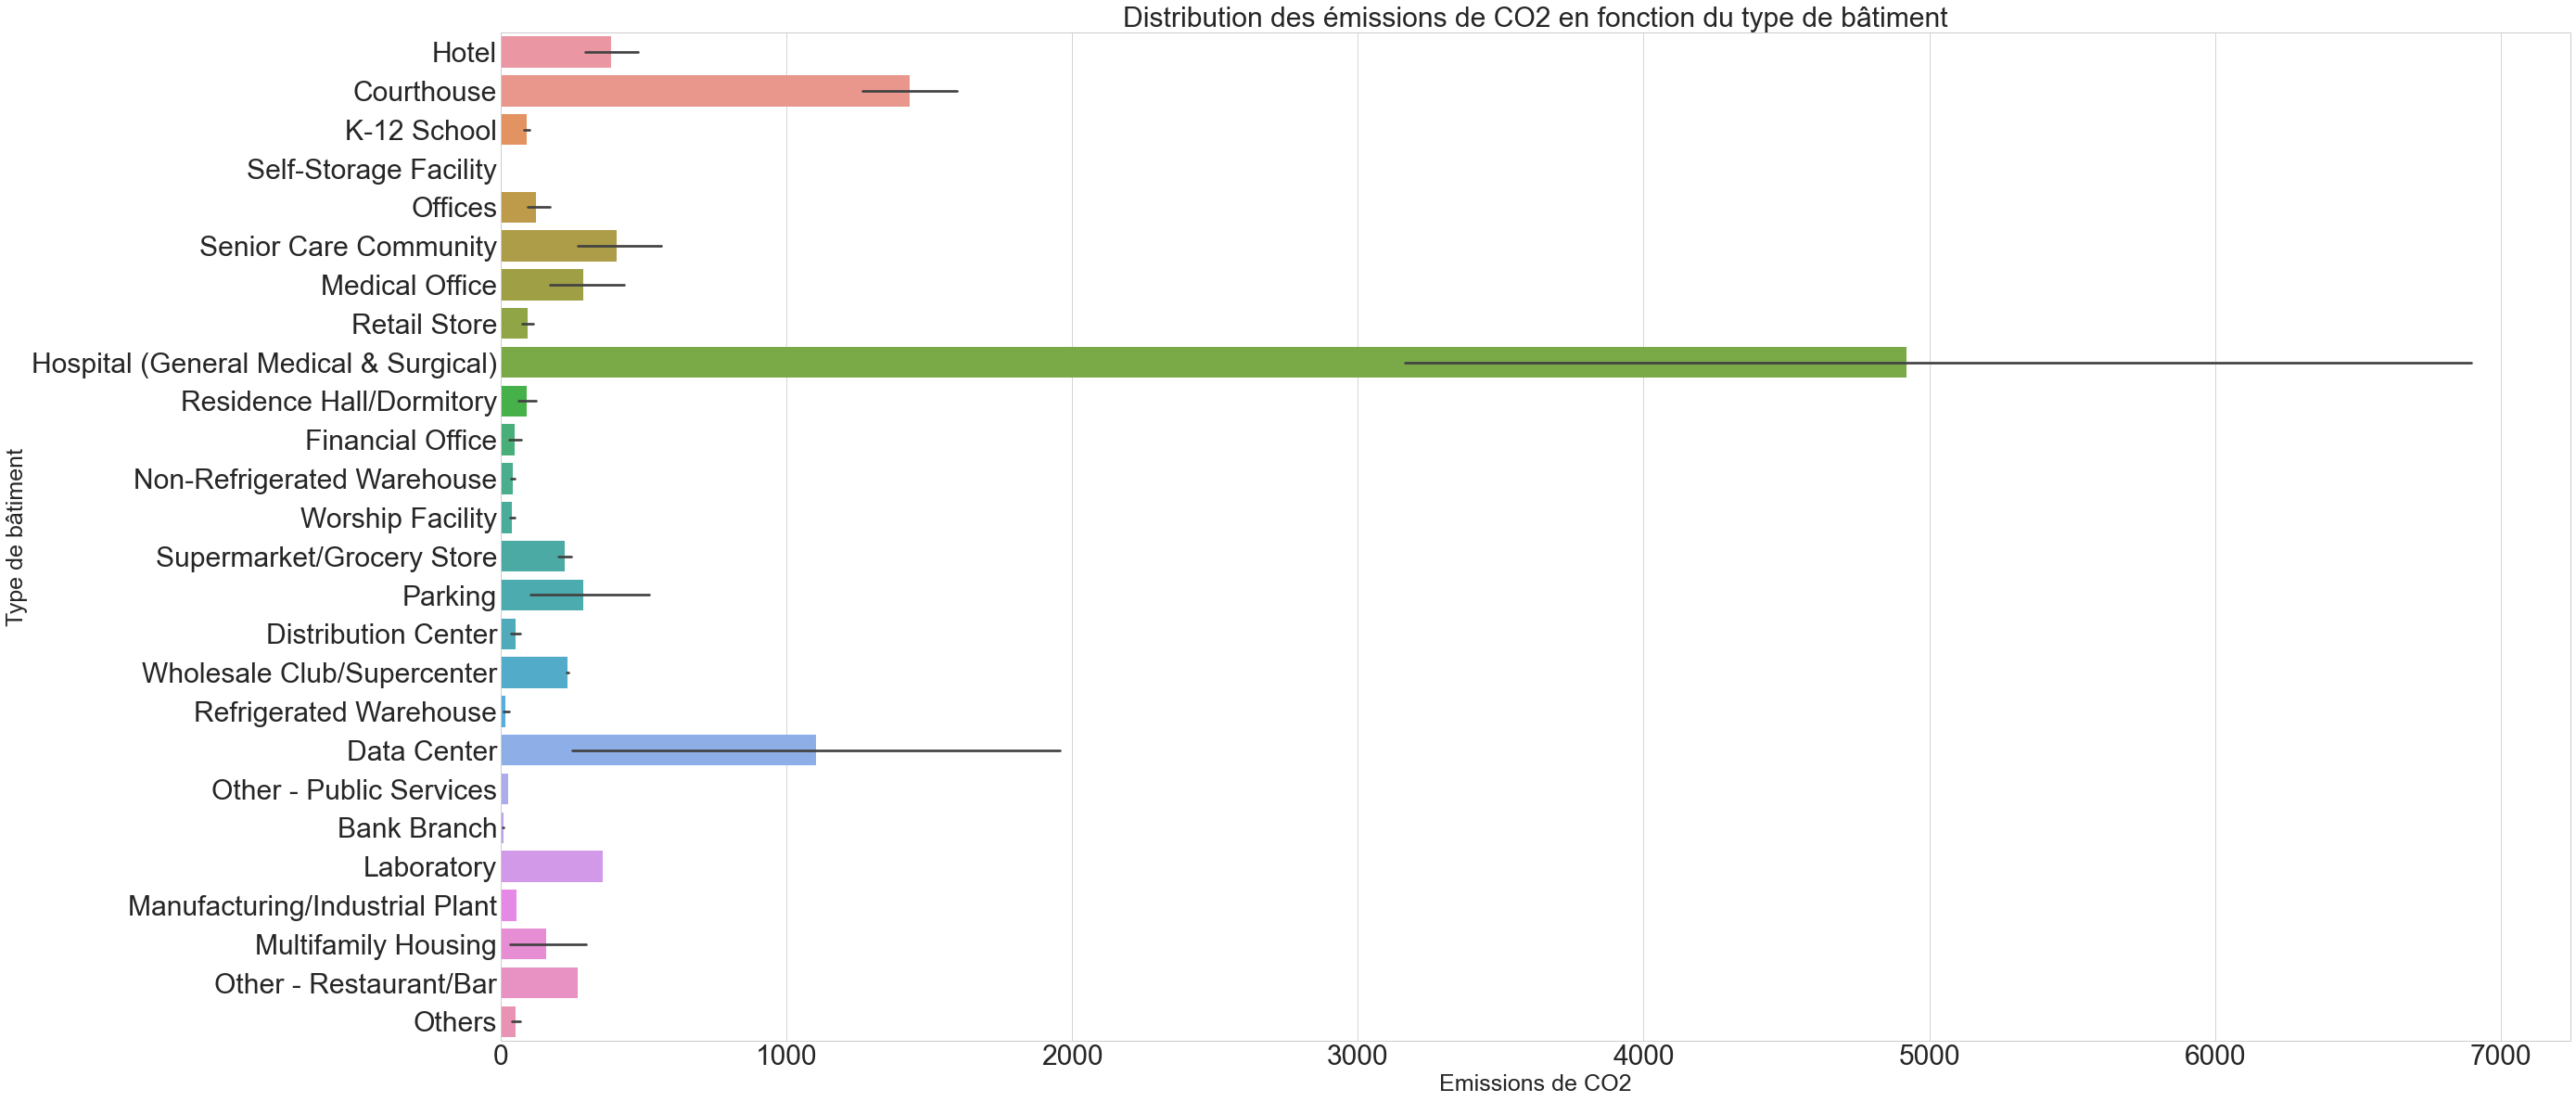

In [55]:
plt.figure(figsize=(40, 20))
sns.barplot(y = df_Elec_Clean['LargestPropertyUseType'], x = df_Elec_Clean['TotalGHGEmissions(Tons)'])
plt.ylabel('Type de bâtiment', fontsize = 25)
plt.xlabel('Emissions de CO2', fontsize = 25)
plt.title('Distribution des émissions de CO2 en fonction du type de bâtiment', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize = 30)
plt.show()

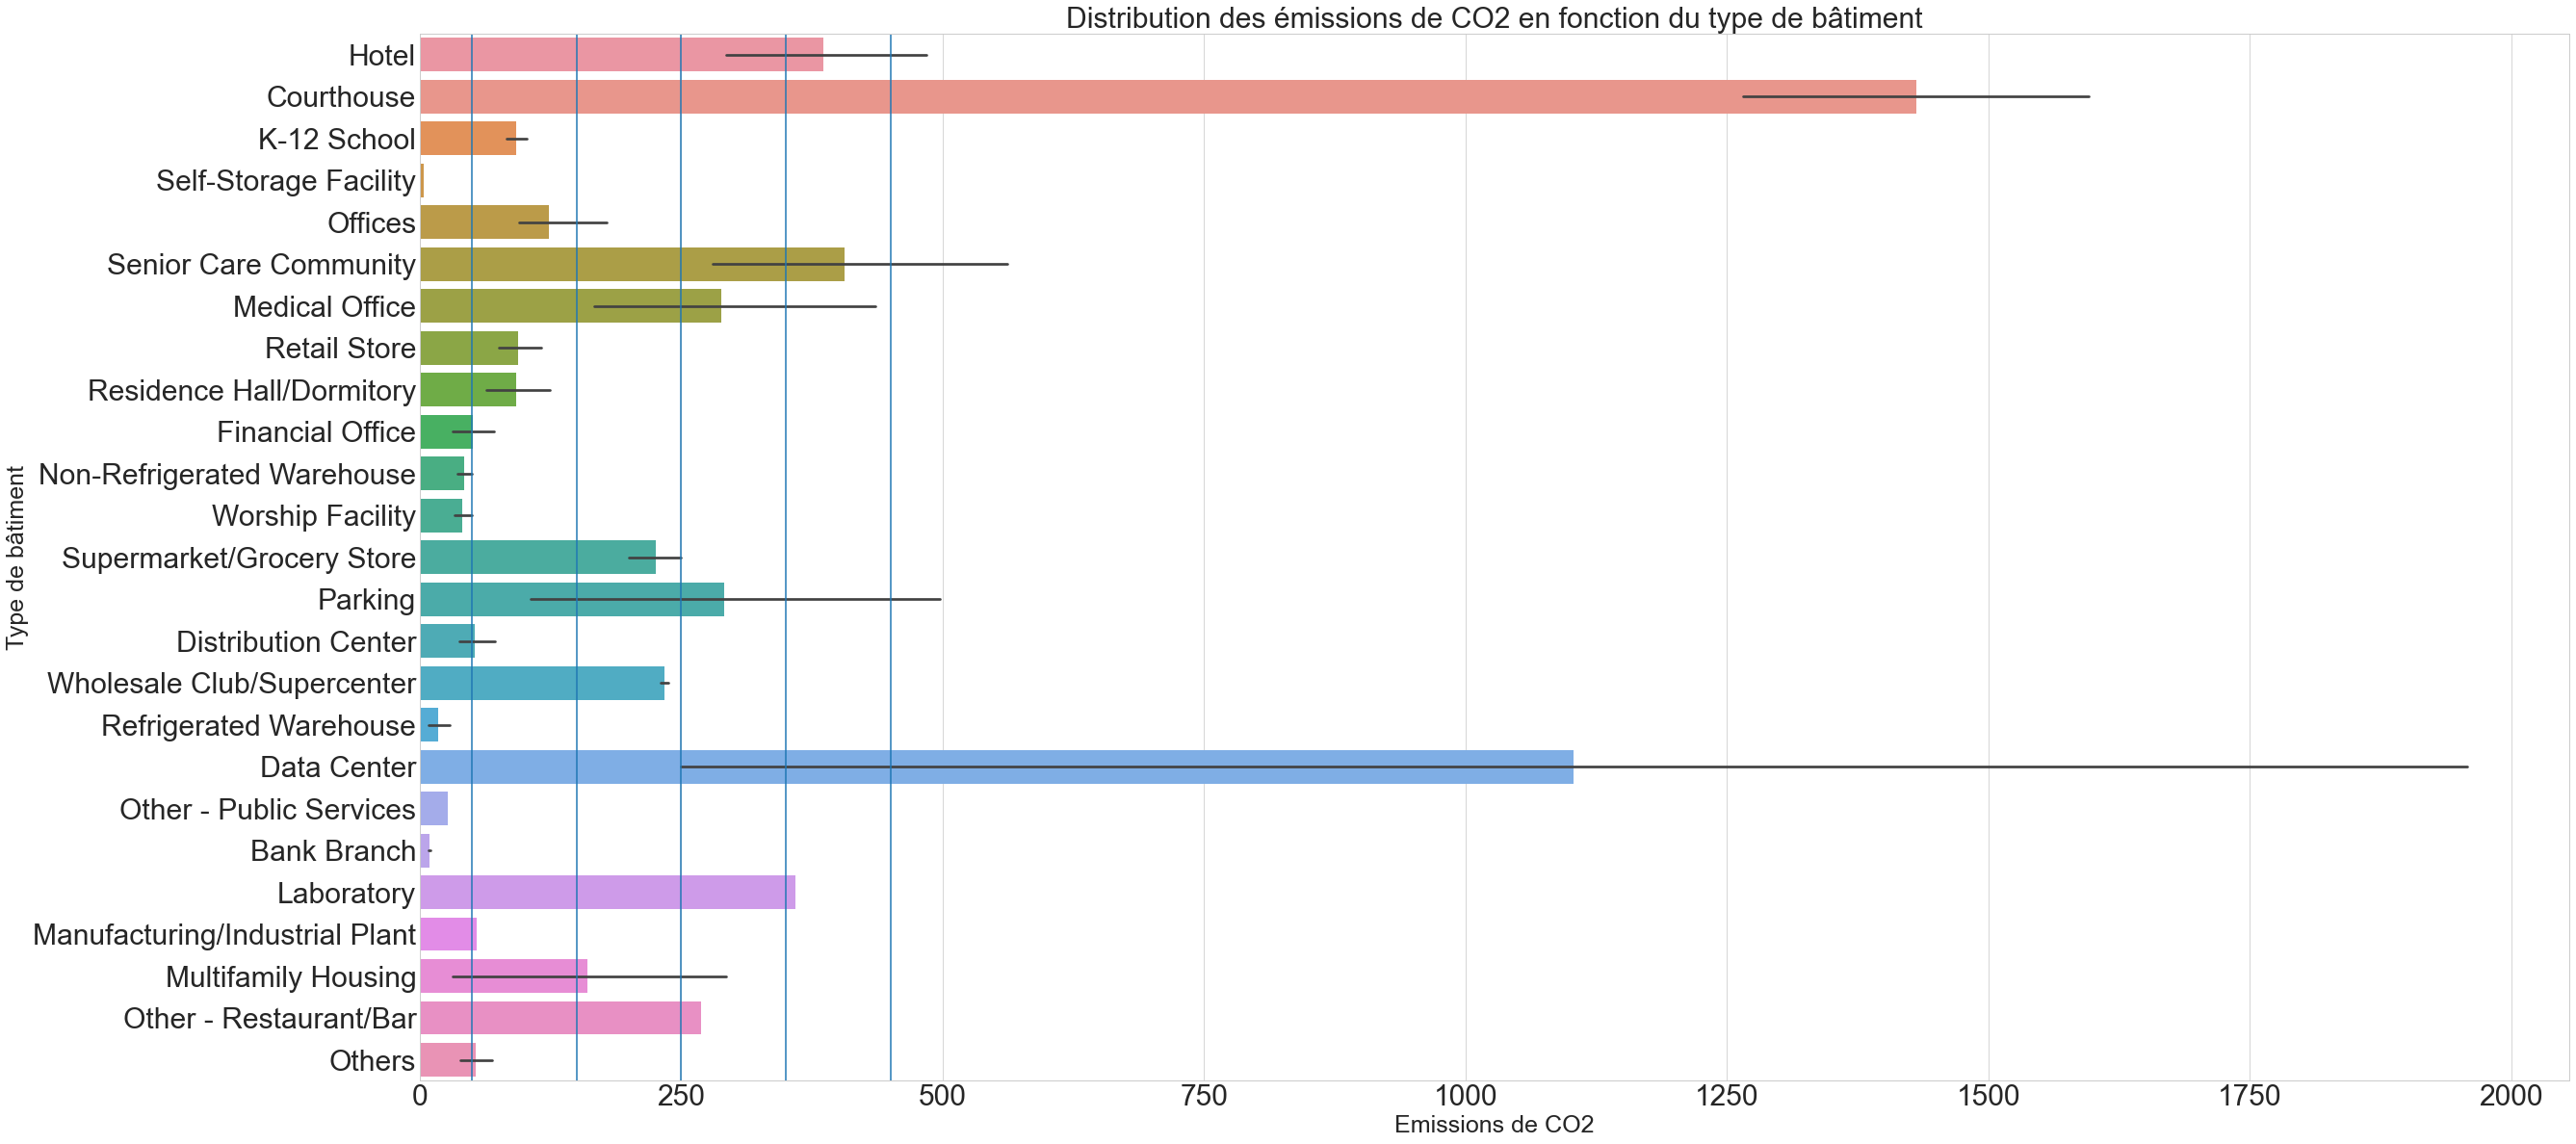

In [56]:
data = df_Elec_Clean[~(df_Elec_Clean['LargestPropertyUseType'] == 'Hospital (General Medical & Surgical)')]

plt.figure(figsize=(40, 20))
sns.barplot(y = data['LargestPropertyUseType'], x = data['TotalGHGEmissions(Tons)'])
plt.ylabel('Type de bâtiment', fontsize = 25)
plt.xlabel('Emissions de CO2', fontsize = 25)
plt.title('Distribution des émissions de CO2 en fonction du type de bâtiment', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize = 30)
plt.axvline(x = 50)
plt.axvline(x = 150)
plt.axvline(x = 250)
plt.axvline(x = 350)
plt.axvline(x = 450)
plt.show()

In [57]:
df_Elec_Clean['BuildingType'].unique()

array(['NonResidential', 'SPS-District K-12', 'Nonresidential COS',
       'Campus'], dtype=object)

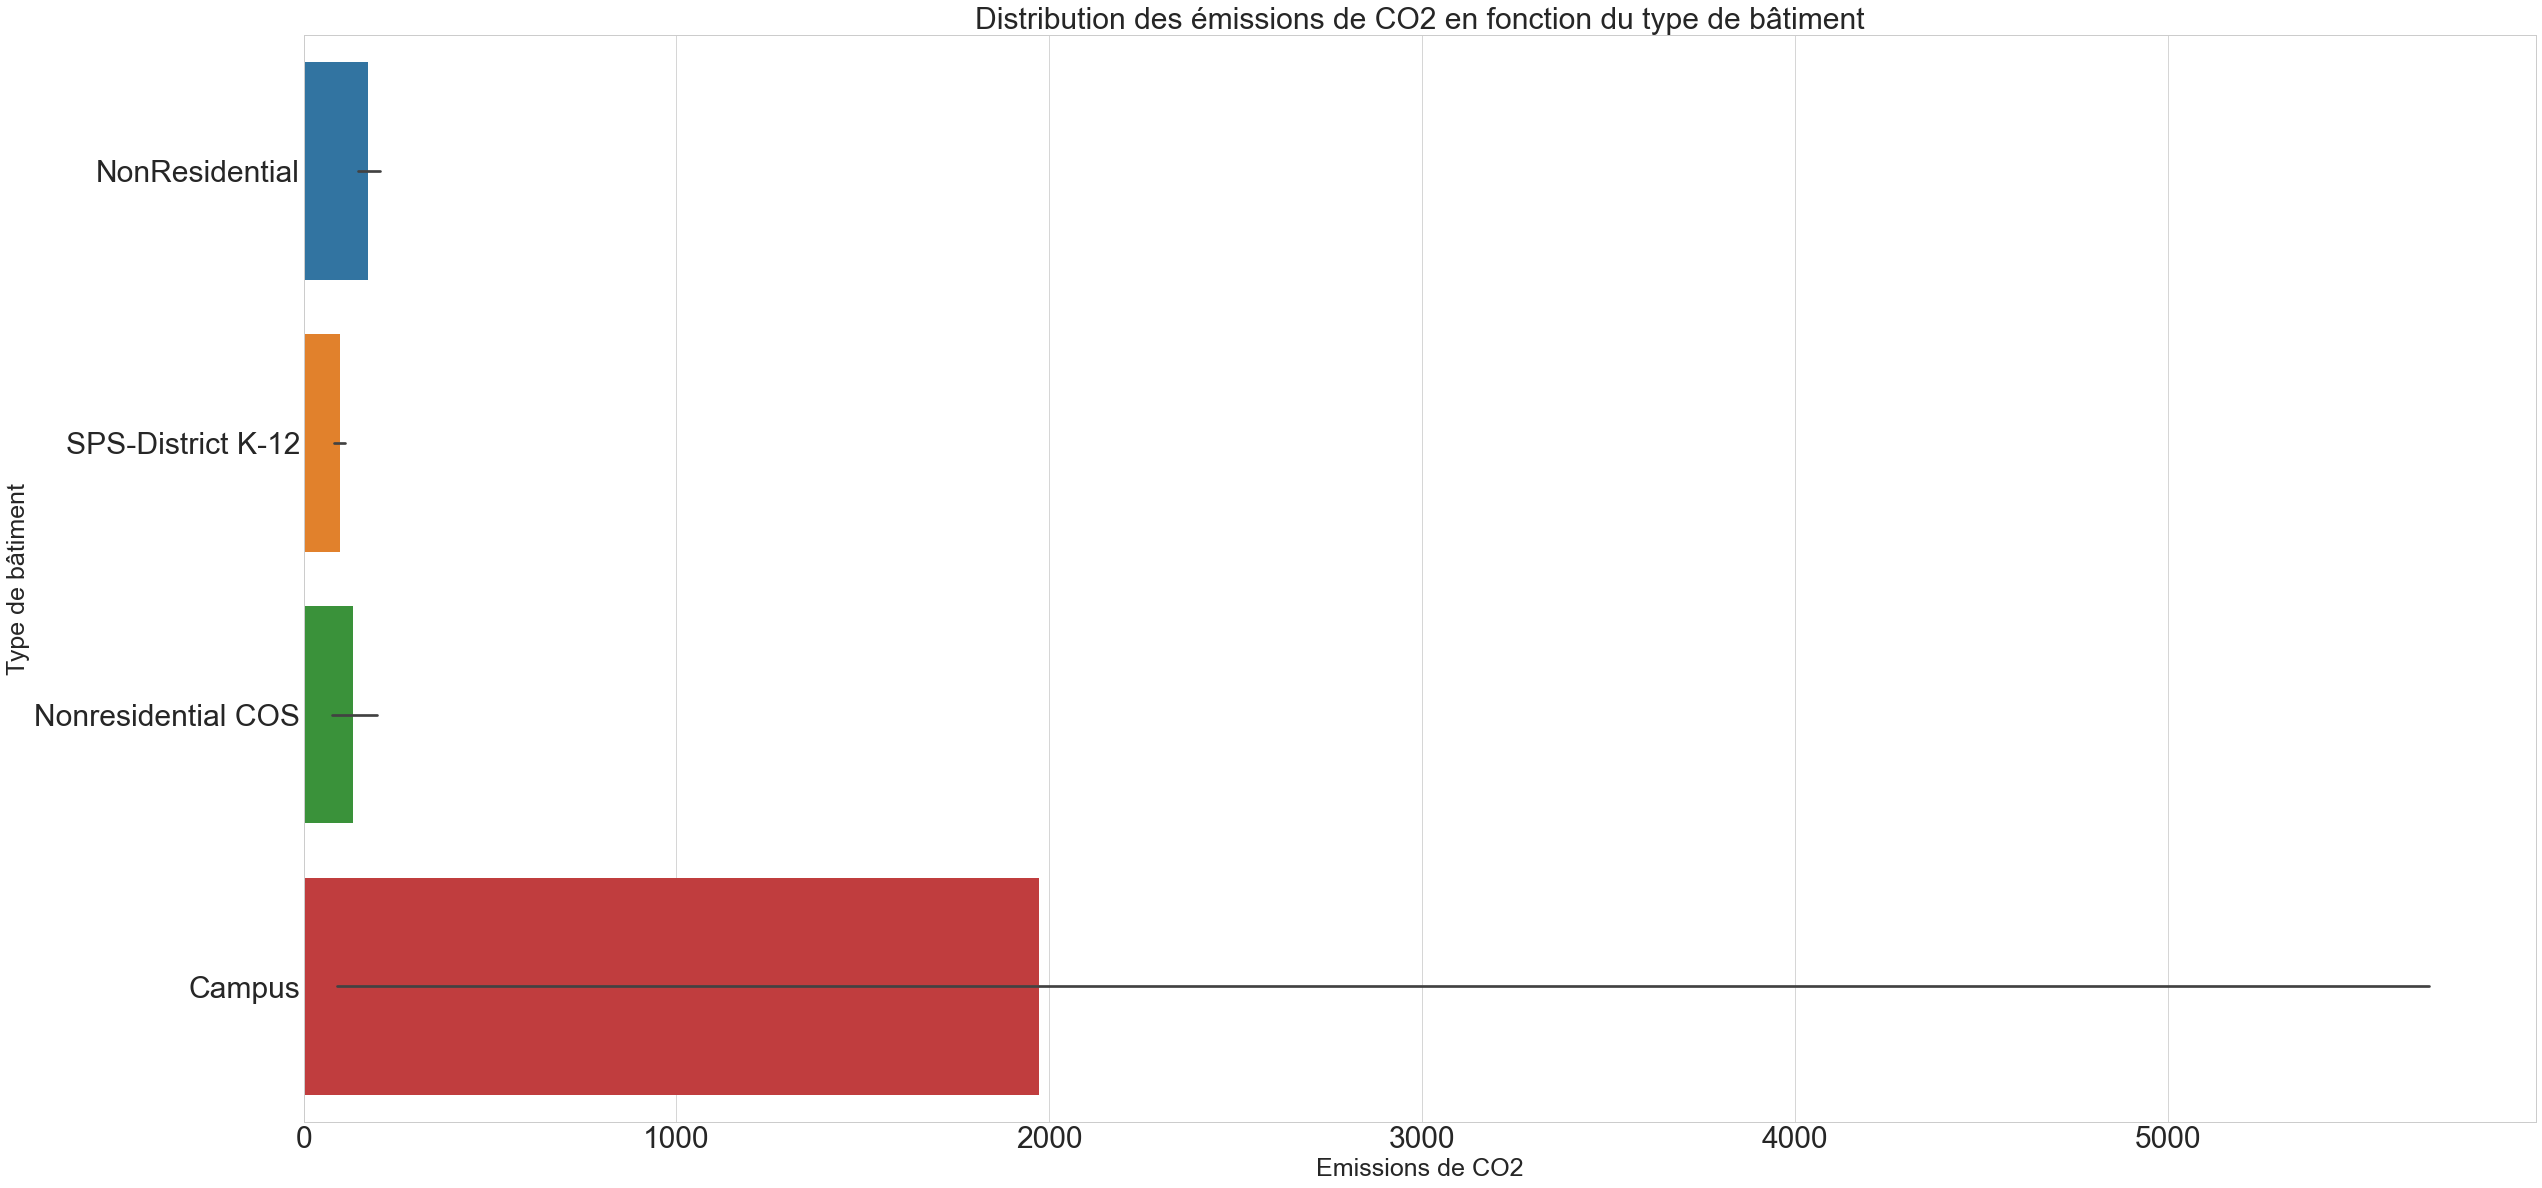

In [58]:
plt.figure(figsize=(40, 20))
sns.barplot(y = df_Elec_Clean['BuildingType'], x = df_Elec_Clean['TotalGHGEmissions(Tons)'])
plt.ylabel('Type de bâtiment', fontsize = 25)
plt.xlabel('Emissions de CO2', fontsize = 25)
plt.title('Distribution des émissions de CO2 en fonction du type de bâtiment', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize = 30)
plt.show()

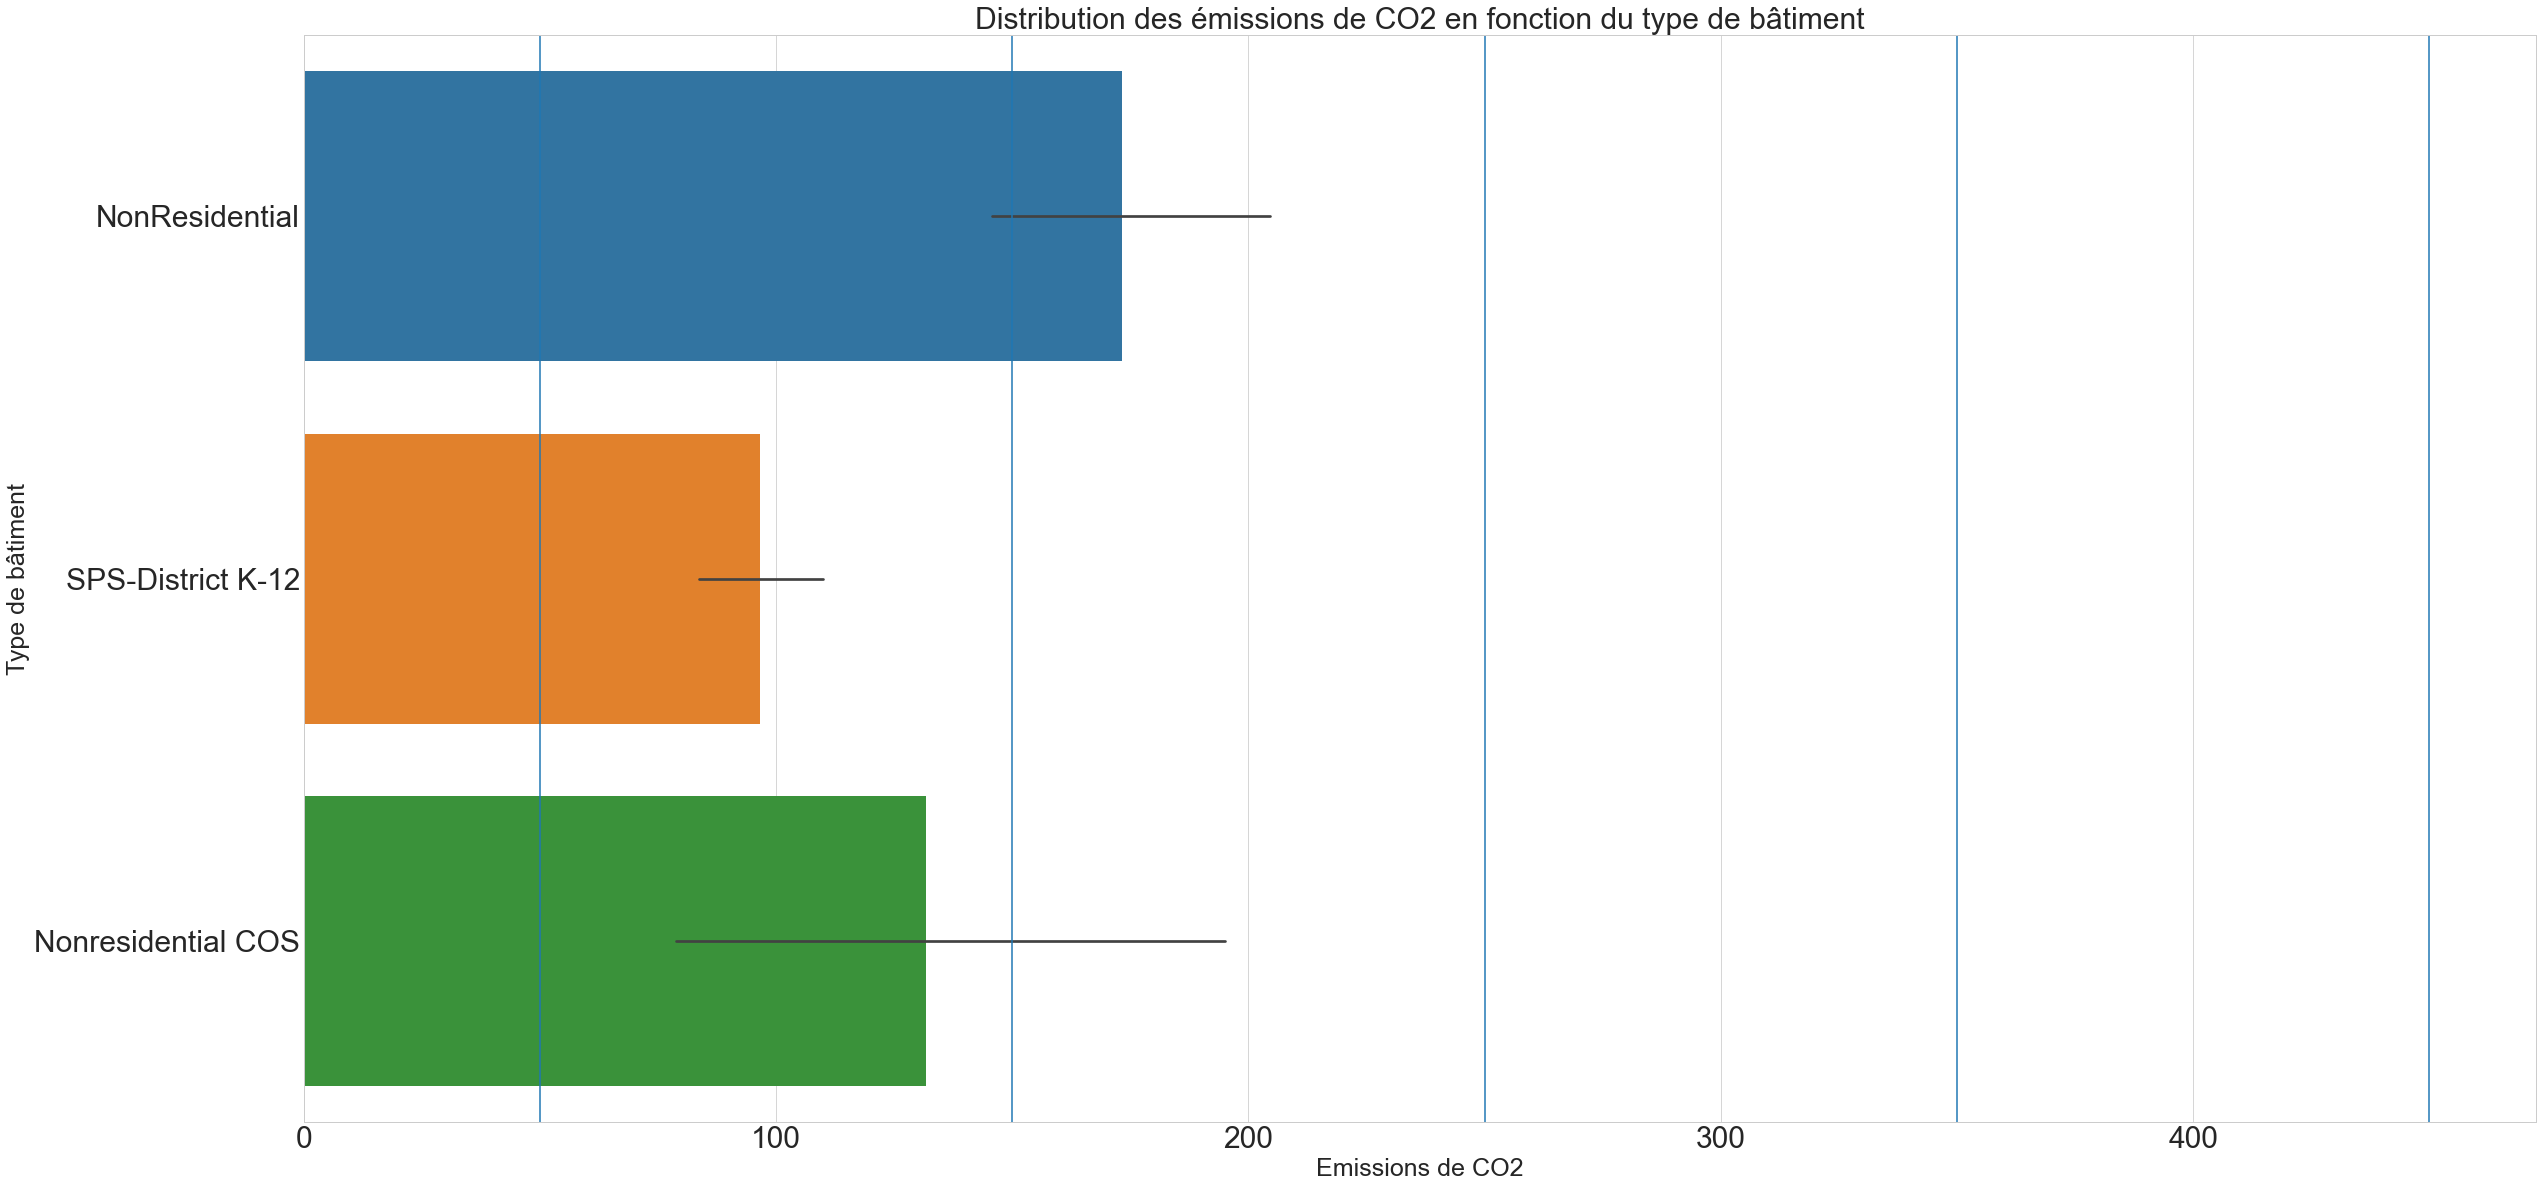

In [59]:
data = df_Elec_Clean[~(df_Elec_Clean['BuildingType'] == 'Campus')]

plt.figure(figsize=(40, 20))
sns.barplot(y = data['BuildingType'], x = data['TotalGHGEmissions(Tons)'])
plt.ylabel('Type de bâtiment', fontsize = 25)
plt.xlabel('Emissions de CO2', fontsize = 25)
plt.title('Distribution des émissions de CO2 en fonction du type de bâtiment', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize = 30)
plt.axvline(x = 50)
plt.axvline(x = 150)
plt.axvline(x = 250)
plt.axvline(x = 350)
plt.axvline(x = 450)
plt.show()

In [60]:
nvelles_categories = {'Self-Storage Facility' : 0,
                      'Small- and Mid-Sized Office' : 0,
                      'Non-Refrigerated Warehouse' : 0,
                      'Worship Facility' : 0,
                      'Refrigerated Warehouse' : 0,
                      'Warehouse' : 0,
                      'Low-Rise Multifamily' : 0,
                      'Office' : 0,
                      'Other - Public Services' : 0,
                      'Bank Branch' : 0,
                      
                      'K-12 School' : 1,
                      'Retail Store' : 1,
                      'Residence Hall/Dormitory' : 1,
                      'Distribution Center' : 1,
                      'Residence Hall' : 1,
                      'Offices' : 1,
                      'Financial Office' : 1,
                      'Manufacturing/Industrial Plant' : 1,
                      'Others' : 1,
                      'SPS-District K-12' : 1,
                      'Nonresidential COS' : 1,
                      
                      'Large Office' : 2,
                      'Supermarket/Grocery Store' : 2,
                      'Wholesale Club/Supercenter' : 2,
                      'Multifamily Housing' : 2,
                      'NonResidential' : 2,
                      
                      'Medical Office' : 3,
                      'Parking' : 3,
                      'Other - Restaurant/Bar' : 3,
                      
                      'Hotel' : 4,
                      'Other' : 4,
                      'Senior Care Community' : 4,
                      'Laboratory' : 4,
                      
                      'Hospital' : 5,
                      'Hospital (General Medical & Surgical)' : 5,
                      'Mixed Use Property' : 5,
                      'Courthouse' : 5,
                      'Data Center' : 5,
                      'Campus' : 5
                     }

In [61]:
df_Elec_Clean.head()

,PropertyName,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,GHGEmissionsIntensity(kgCO2e/ft2),SiteEnergyUse(kBtu),TotalGHGEmissions(Tons)
0,Mayflower park hotel,NonResidential,Hotel,1927,1.0,12.0,88434,0,88434,Hotel,...,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,No,Compliant,2.64,6981428.0,249.43
1,Paramount hotel,NonResidential,Hotel,1996,1.0,11.0,103566,15064,88502,Hotel,...,0.0,1144563.0,3905411.0,44490.0,4448985.0,No,Compliant,2.38,8354235.0,263.51
2,Westin hotel,NonResidential,Hotel,1969,1.0,41.0,961990,0,961990,Hotel,...,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,Yes,Compliant,1.92,73130656.0,2061.48
3,Hotel max,NonResidential,Hotel,1926,1.0,10.0,61320,0,61320,Hotel,...,23458518.0,811521.0,2769023.0,20019.0,2001894.0,No,Compliant,31.38,28229320.0,1936.34
4,Warwick seattle hotel,NonResidential,Hotel,1980,1.0,18.0,119890,12460,107430,Hotel,...,0.0,1777841.0,6066245.0,87631.0,8763105.0,No,Compliant,4.02,14829099.0,507.70


Nos catégories seront donc choisies selon les émissions de CO2 du groupe de bâtiments.
- 1ère catégorie :```émissions``` <= 50 Tons
- 2ème catégorie : 50 < ```émissions``` <= 150 Tons
- 3ème catégorie : 150 < ```émissions``` <= 250 Tons
- 4ème catégorie : 250 < ```émissions``` <= 350 Tons
- 5ème catégorie : 350 < ```émissions``` <= 450 Tons
- 6ème catégorie : 450 Tons < ```émissions```

In [62]:
listeCatégorie = ('PrimaryPropertyType', 'LargestPropertyUseType', 'BuildingType')

In [63]:
for variable in listeCatégorie:  
    df_Elec_Clean[variable] = df_Elec_Clean[variable].map(nvelles_categories)
    df_Elec_Clean[variable] = df_Elec_Clean[variable].astype('category')

[Retour au sommaire](#Sommaire)

### Transformation des variables numériques cibles <a class="anchor" id="Partie4_4"></a>
Nous aimerions prédire la consommation d'énergie ```SiteEnergyUse(kBtu)``` ainsi que les émissions de CO2 ```TotalGHGEmissions(MetricTonsCO2e)```. Cependant, ces variables sont asymétriques, nous allons donc les transformer en variables symétriques à l'aide de la fonction ```log```.

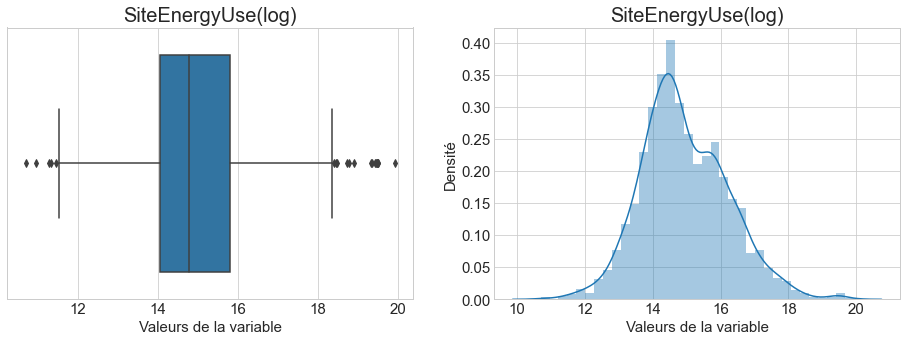

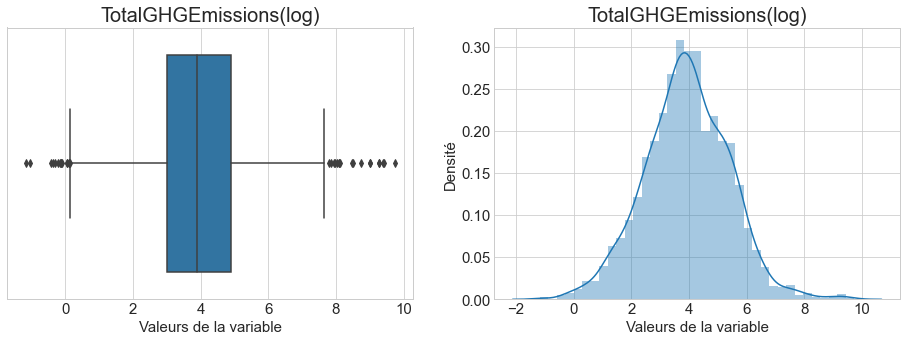

In [64]:
df_Elec_Clean['SiteEnergyUse(log)'] = np.log(df_Elec_Clean['SiteEnergyUse(kBtu)'])
decrit_variable(df_Elec_Clean, 'SiteEnergyUse(log)')

df_Elec_Clean['TotalGHGEmissions(log)'] = np.log(df_Elec_Clean['TotalGHGEmissions(Tons)'])
decrit_variable(df_Elec_Clean, 'TotalGHGEmissions(log)')

Pour éviter la fuite de données, nous ne conservons pas les données de consommation autres que celles que nous souhaitons prédire.

In [65]:
df_Elec_Clean = df_Elec_Clean[['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'NumberofBuildings',
                               'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
                               'LargestPropertyUseTypeGFA', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
                               'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions(Tons)', 'SiteEnergyUse(log)',
                               'TotalGHGEmissions(log)']]

df_Elec_Clean.head()

,BuildingType,PrimaryPropertyType,LargestPropertyUseType,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions(Tons),SiteEnergyUse(log),TotalGHGEmissions(log)
0,2,4,4,1.0,12.0,88434,0,88434,88434.0,2023032.0,3686160.0,1272388.0,65.0,6981428.0,249.43,15.758764,5.519178
1,2,4,4,1.0,11.0,103566,15064,88502,83880.0,0.0,3905411.0,4448985.0,51.0,8354235.0,263.51,15.938279,5.574091
2,2,4,4,1.0,41.0,961990,0,961990,757243.0,19660404.0,49762435.0,3709900.0,18.0,73130656.0,2061.48,18.107758,7.631179
3,2,4,4,1.0,10.0,61320,0,61320,61320.0,23458518.0,2769023.0,2001894.0,1.0,28229320.0,1936.34,17.155872,7.568555
4,2,4,4,1.0,18.0,119890,12460,107430,123445.0,0.0,6066245.0,8763105.0,67.0,14829099.0,507.70,16.512102,6.229891


In [66]:
df_Elec_Clean.shape

(2150, 17)

[Retour au sommaire](#Sommaire)

## Enregistrement du fichier nettoyé <a class="anchor" id="Partie5"></a>

In [67]:
df_Elec_Clean.to_csv('df_Elec.csv', sep= ',', index=False)